# Stepik. Регулярные выражения в Python
https://stepik.org/course/107335/info
Автор Snorovka 

Большой курс, в котором разобрано всё от А до Я:
- Синтаксис регулярных выражений
- Все методы для работы с регулярными выражениями
- Компиляция регулярных выражений
- Работа с группами
- Флаги

# <center> ТЕОРИЯ





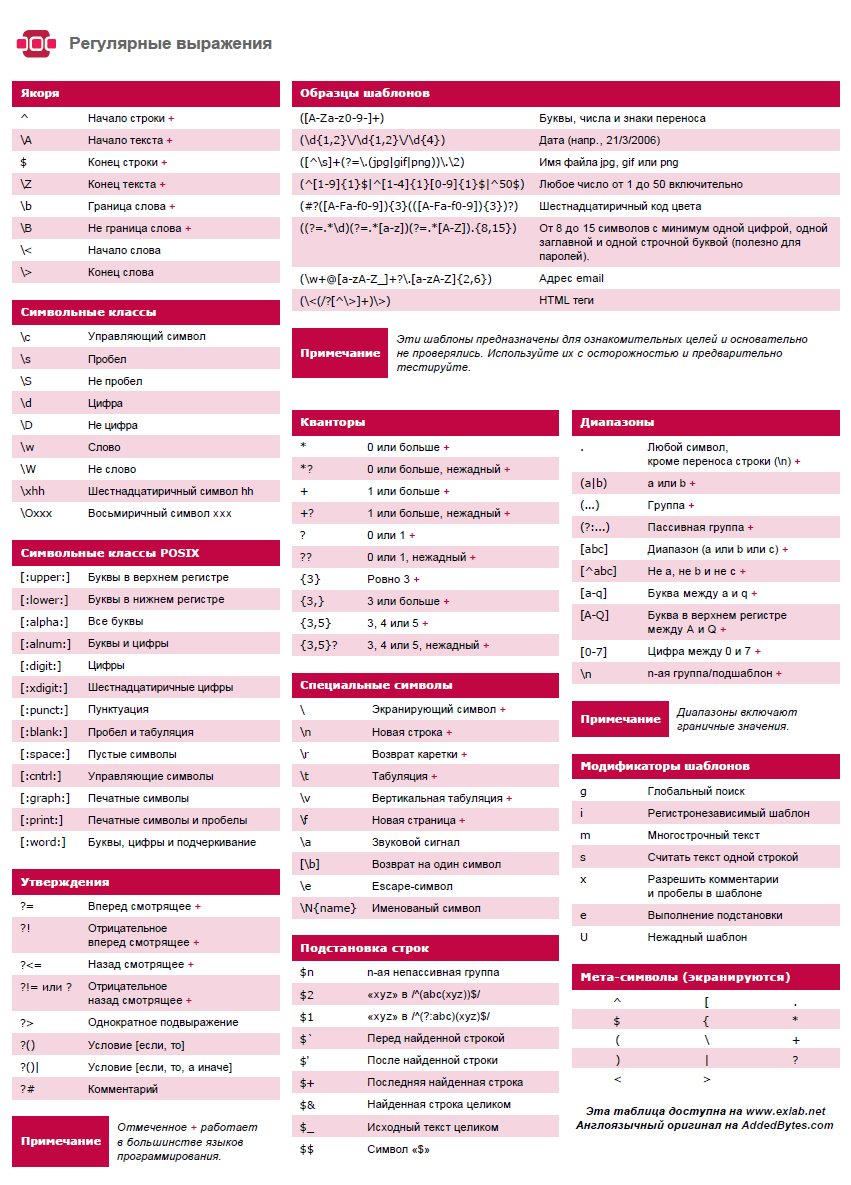

## Сырые строки / raw strings

Чтобы строка стала «сырой», перед ней необходимо поставить символ r в любом регистре:

- common_string = 'C:\file.txt' # Обычная строка
- raw_string = r'C:\file.txt' # Сырая строка


В такой строке отключается экранирование. Это значит, что обратный слеш считается самостоятельным символом. Основное применение сырых строк – работа с регулярными выражениями.

### f-строки
Символы, которые ставятся перед началом строки, и изменяют её поведение, называются префиксами. Ещё один префикс, который понадобится в курсе - это префикс f. Он позволяет форматировать строку, вставляя в неё какие-либо выражения:

- a = 1
- b = 2

###  Добавляем выражения в строку с помощью специального синтаксиса {}

- print(f"{a} + {b} = {a + b}")- 
- print(f"5! = {1 * 2 * 3 * 4 * 5}")

Комбинируем префиксы
Если вы не знали, то можно использовать несколько префиксов сразу. Например, вот так:

### Используем 2 префикса одновременно:
- raw_f_string = rf'C:\file.txt'

## Частоиспользуемые шаблоны


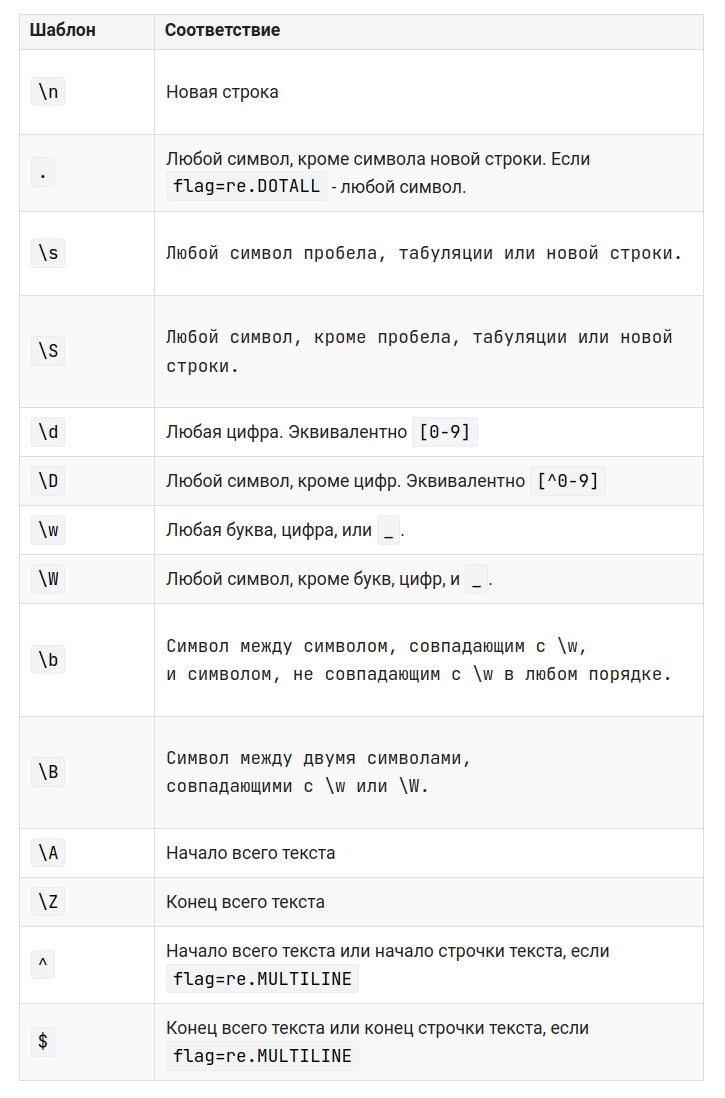

### \b
Очень часто используется как граница слова или числа.
Он стоит между \w и \W и не зависит от того, в каком порядке они расположены: он будет как между \w\W, так и между \W\w.

В чём же подвох?
Если вам нужны более точные совпадения, то использовать \b как границу слова или числа не стоит. Приведу в пример регулярное выражение \b123\b, что написано выше:

Оно найдёт 123 в следующих примерах:
- #123%- 
-  123 
- 123
- (123)
- ^123$
- -123.

И пропустит 123 в этих примерах:
- a123b
- g123
- 123g
- 123_
- _123
- 11234

Регулярное выражение пропускает все числа 123, если рядом с ними будут написаны любые символы из шаблона \w: буквы, цифры, _.

Мы будем использовать \b для поиска слов и чисел только в начале курса. Позже научимся искать нужные строки более точно.

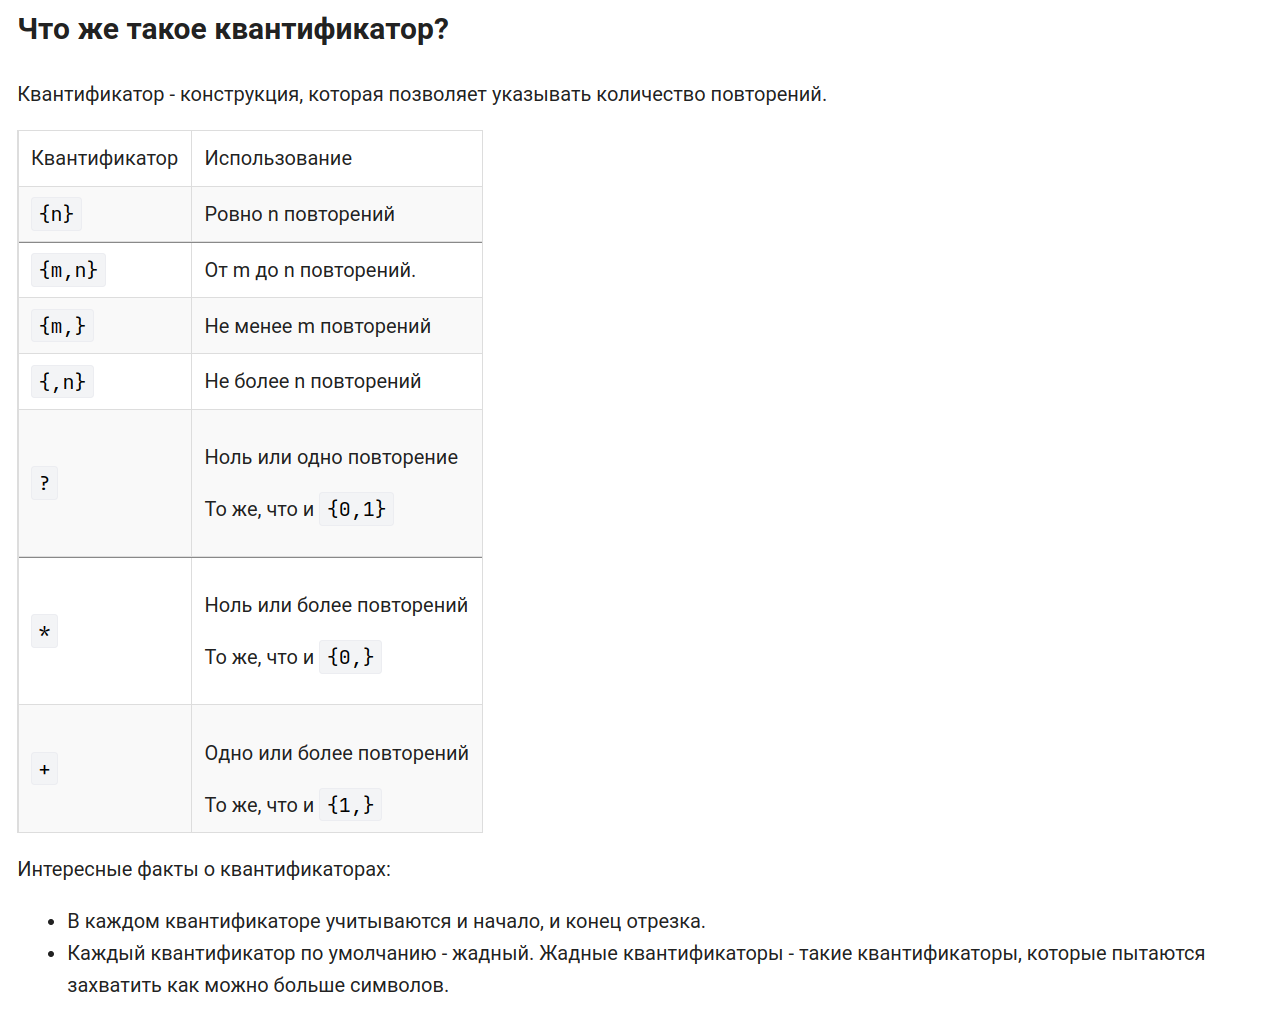

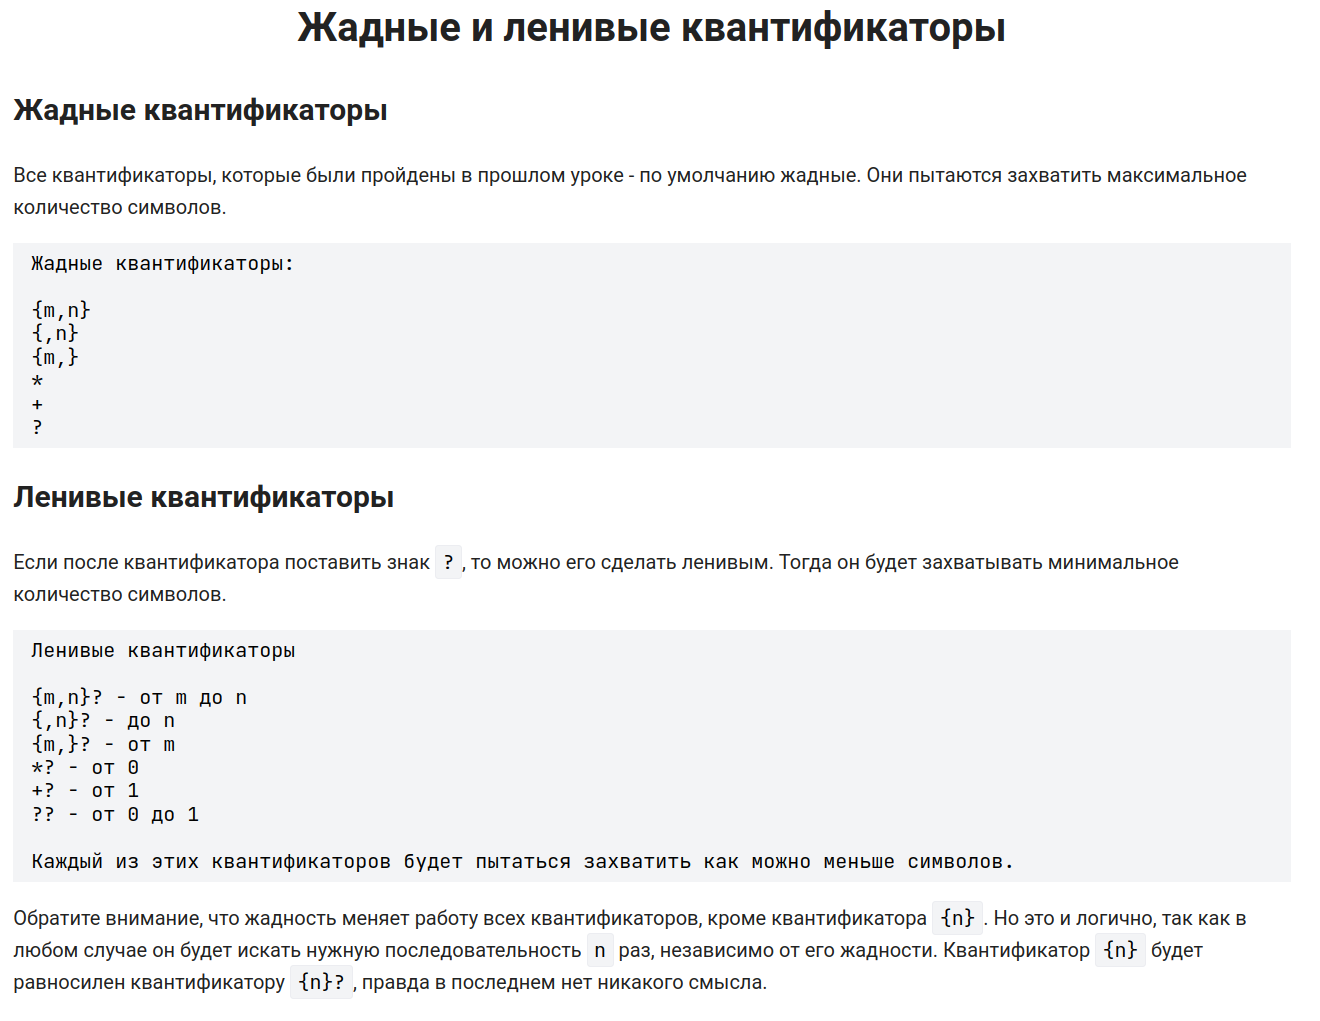

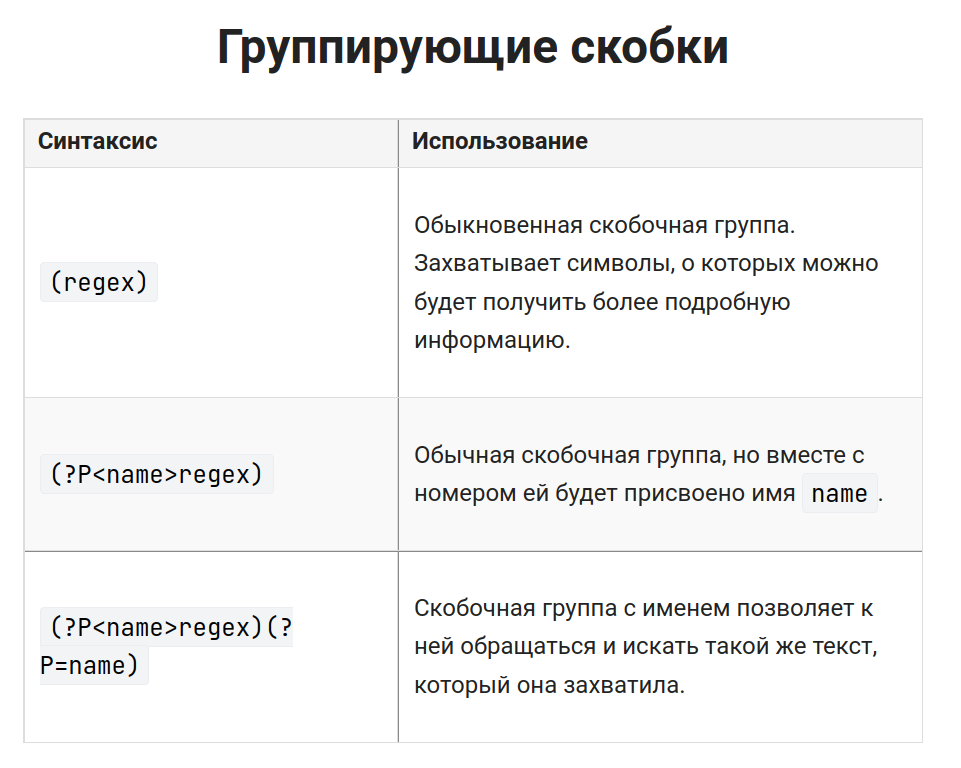

- Обычная группа ([a-z]{4})
- Та же группа, только уже именованная (?P<name>[a-z]{4})
- Снова именованная группа, но мы получаем текст, который она захватила ранее благодаря синтаксису (?P<name>[a-z]{4})(?P=name)
- Ссылаться можно не только на именованные группы, но и на обычные. Для этого достаточно использовать синтаксис \1, \2, \3, ... и так далее. Цифра после слеша означает номер группы, к которой вы обращаетесь.

    Повторяем регулярное выражение, но уже без именованных групп ([a-z]{4})\1 

## Cкобочные выражения
- (?#) - скобочное выражение, позволяющее написать комментарий в регулярном выражении
- **(?:) - важное скобочное выражение, которое группирует регулярное выражение, но не захватывает его как скобочная группа.** Так и называется - Non-capturing group, т.е. группа без захвата.

Его можно использовать, например, чтобы применять квантификаторы сразу к нескольким символам:
(?:\d.){2} равносильно \d.\d.

Если бы мы использовали обычные группирующие скобки, они бы захватили эти символы отдельно

Еще пример использования (?:).

Такое выражение (?<=^| )(рег. выражение) которое проверяет стоит ли перед (рег. выражение) начало строки ^ или "пробел" вызовет ошибку.

А переписаное так, сработает (?:(?<=^)|(?<= ))

### Условие (?(n)yes|no)
Есть интересное скобочное выражение, которое позволяет добавлять условия в регулярные выражения. Если у группы n нашлись совпадения - возвращается шаблон до |. В противном случае возвращается шаблон после |.

## Lookahead и Lookbehind

Очень полезные скобочные группы, которые позволяют "смотреть" что находится сзади и спереди регулярных выражений. Часто используются, когда нужно найти текст или какую-то последовательность между символами, которые не нужно захватывать в регулярное выражение.

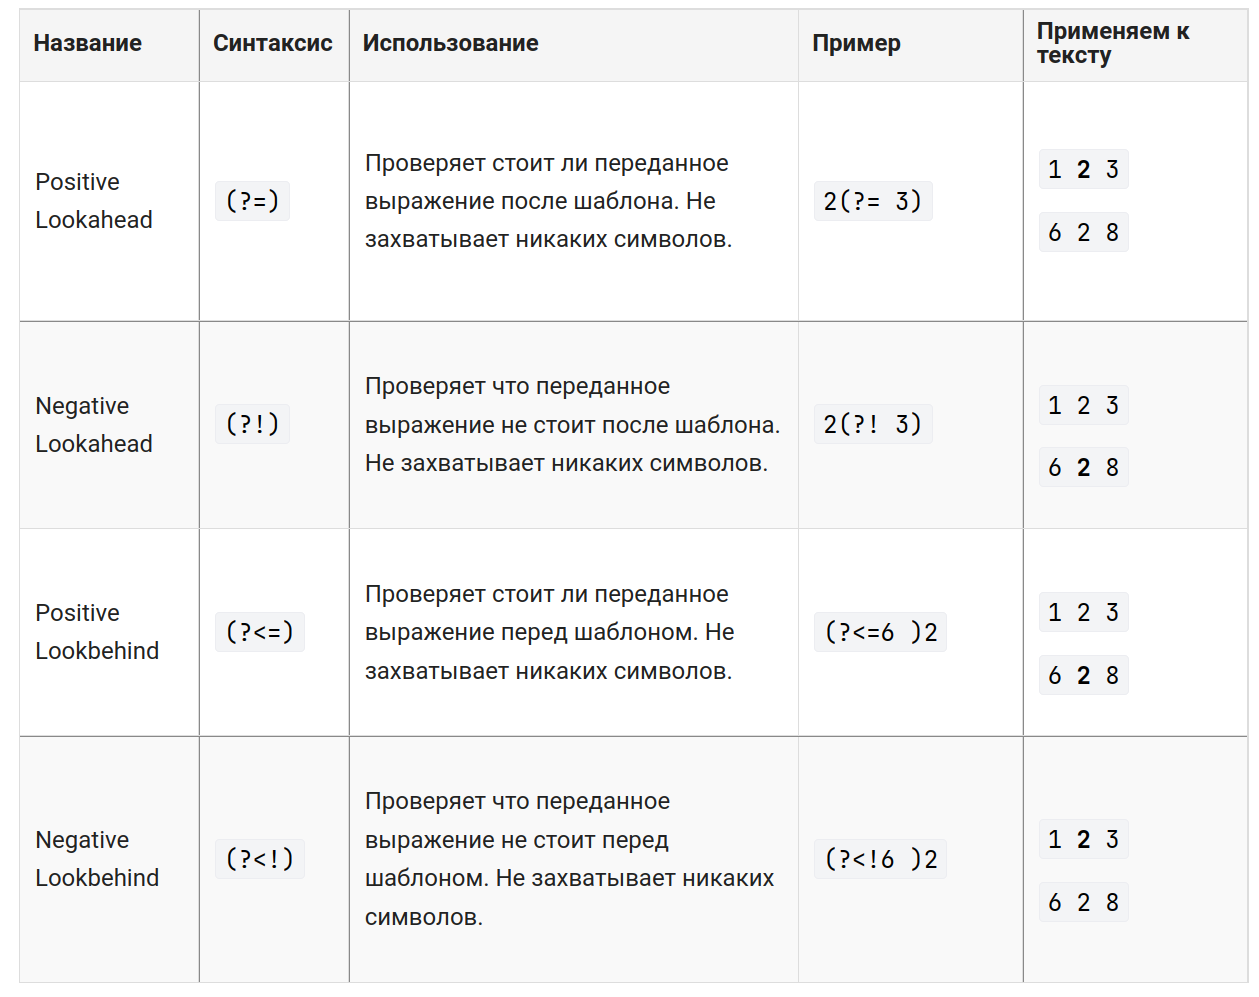

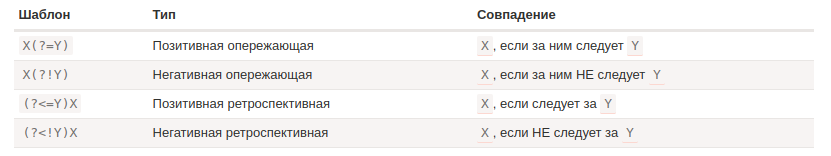

# <center>ЗАДАЧИ

In [11]:
import re


class Print_regex:
    """
     Красивый вывод результата RegEx
    """
    def __repr__(self):
        out = "\033[1m\033[91m | \x1b[0m\033[93m".join([" "]+re.findall(regex, text))
        return out[17:]
    
    
R = Print_regex()

## Дежавю и дежавю
Найдите все слова Дежавю и дежавю в тексте. Используйте |

In [12]:
text = "Мне кажется, что похожее задание уже было. У меня чувство дежавю."

regex = r"Дежавю|дежавю"
regex = r'[Дд]ежавю'
regex = r"(?:Д|д)ежавю"

R

дежавю

## BTC кошельки
Криптостример Григорий отмывает грязные деньги через миксеры, а также через пару своих кошельков. Но вот незадача, он потерял адрес своего биткоин кошелька, на который должны прийти все монеты. Помогите Грише. Напишите регулярное выражение, которое найдёт все адреса биткоин кошельков.

Адрес представляет собой набор из префикса (1, или 3, или bc1) и основной части длиной от 27 до 34 символов.

В основной части используются:

Весь латинский алфавит, кроме: O, I, l. Все арабские цифры, кроме 0.



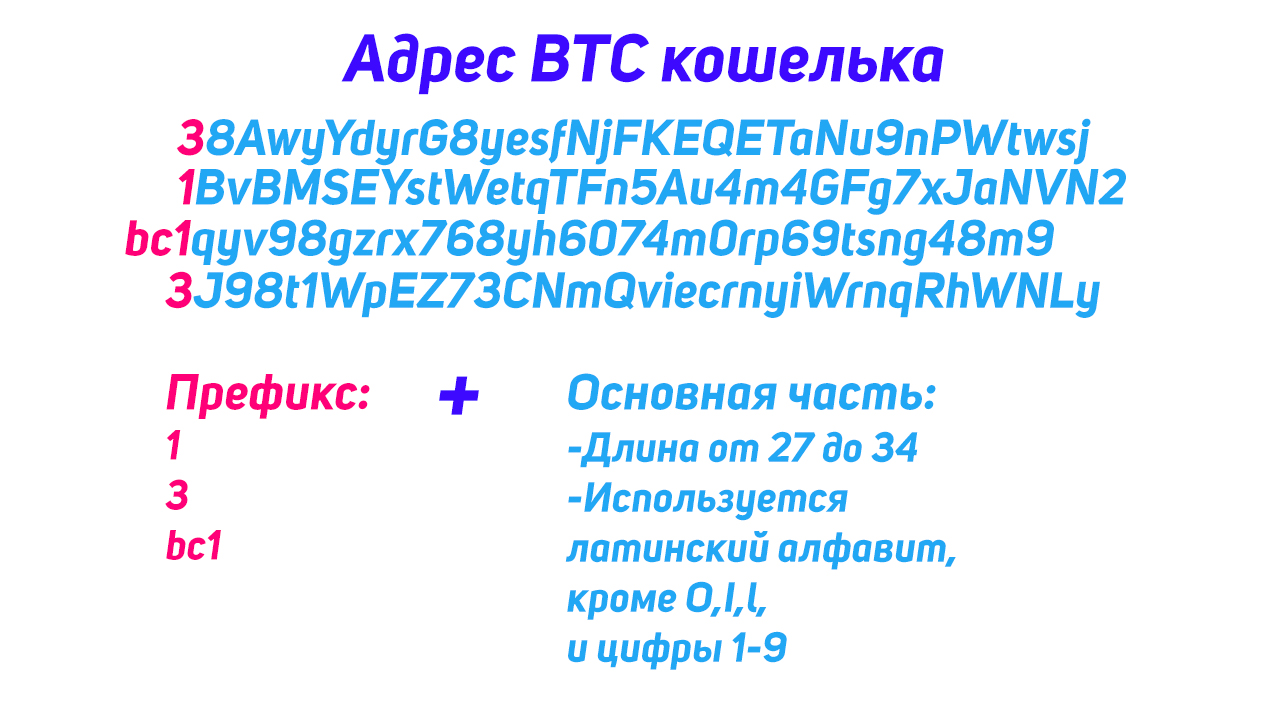

In [13]:
text = "FDSF WDFSWD9FSD DFSD9FSD9F 33aGVnZCm9hmJDqoRDJFTQm7B2VsESFa8a DSFSDFS4fdsds4Wsd 1LxYHh12ysPTrYqanvSwFU4SQQA5NsmNdG sgsfsdsdfsds 1vj8Q9w16Ats5wSGjG6vbmFofr9x9Kz2M 1NT6cJZaDY7TDwRZ2NiVDTG6wfS1gue3gV sdfsdfsdfsdfsdf sdf sdfsdfsdfs 1MAJzPUS2JwQ9T4Gya9knokpsEMn3hqG6L 1M6TdG68oGCTzU1HCSMNMppKbWbsMsgevf 1NatRaPvbVjqoWP8W3bXV9rmY1SjnAF7ER 1Pki745E2oZxsBzQWfyyYocKzKEiARufcq 1Mz3aXtGBgWQyVzuysVC6Dti4uy8ifMZDZ 1N8nBtfvFXfSzDYyVFsae5zeSgQpt4mEfz"
regex = r"\b[13][1-9a-km-zA-HJ-NP-Z]{27,34}\b|\bbc1[1-9a-km-zA-HJ-NP-Z]{27,34}\b"
R

33aGVnZCm9hmJDqoRDJFTQm7B2VsESFa8a | 1LxYHh12ysPTrYqanvSwFU4SQQA5NsmNdG | 1vj8Q9w16Ats5wSGjG6vbmFofr9x9Kz2M | 1NT6cJZaDY7TDwRZ2NiVDTG6wfS1gue3gV | 1MAJzPUS2JwQ9T4Gya9knokpsEMn3hqG6L | 1M6TdG68oGCTzU1HCSMNMppKbWbsMsgevf | 1NatRaPvbVjqoWP8W3bXV9rmY1SjnAF7ER | 1Pki745E2oZxsBzQWfyyYocKzKEiARufcq | 1Mz3aXtGBgWQyVzuysVC6Dti4uy8ifMZDZ | 1N8nBtfvFXfSzDYyVFsae5zeSgQpt4mEfz

In [4]:
regex = r'\b(?:1|3|bc1)[1-9A-HJ-NP-Za-km-z]{27,34}\b'
R

33aGVnZCm9hmJDqoRDJFTQm7B2VsESFa8a | 1LxYHh12ysPTrYqanvSwFU4SQQA5NsmNdG | 1vj8Q9w16Ats5wSGjG6vbmFofr9x9Kz2M | 1NT6cJZaDY7TDwRZ2NiVDTG6wfS1gue3gV | 1MAJzPUS2JwQ9T4Gya9knokpsEMn3hqG6L | 1M6TdG68oGCTzU1HCSMNMppKbWbsMsgevf | 1NatRaPvbVjqoWP8W3bXV9rmY1SjnAF7ER | 1Pki745E2oZxsBzQWfyyYocKzKEiARufcq | 1Mz3aXtGBgWQyVzuysVC6Dti4uy8ifMZDZ | 1N8nBtfvFXfSzDYyVFsae5zeSgQpt4mEfz

## - Хорошая работа, Олег!
Найдите в тексте следующие строки:

- Привет, Олег
- Привет, Григорий
- Пока, Олег
- Пока, Григорий

In [5]:
text = "ЩЩВАРЩЫАРЩЫВППривет, Олегвщыврцыра9ц909авПривет, Олег Привет, Григорий Пока"

regex = r"Привет, Олег|Привет, Григорий|Пока, Олег|Пока, Григорий"
regex = r'Привет,|Олег|Пока,|Григорий'
regex = r'(?:Привет|Пока), (?:Олег|Григорий)'
R

Привет, Олег | Привет, Олег | Привет, Григорий

## Повторим материал

### Не понял!
Напишите любое регулярное выражение, которое находит само себя полным совпадением.

In [6]:
text = "  "
re.findall(r"", text)

['', '', '']

### Поиск слова №1
Напишите регулярное выражение, которое найдёт все слова «Ты» или «ты». Другие формы слова «ты», такие как «твой» и т. д., учитывать не следует. Именно слова, не подстроки.

In [7]:
text = "латынь по-латыни охоты анекдоты стыдлив кометы золотым балеты пустыне ты цветы ланиты открыты остыли бутылкой отыскать суеты черты пустынным клеветы черты поэты предметы Ты"
regex = r'\b[Тт]ы\b'
regex = r"(?<!\w)(?:ты|Ты)(?!\w)"
R

ты | Ты

### Поиск слова №2
Напишите регулярное выражение, которое найдёт все слова «долг» или «Долг». Другие формы слова «долг», такие как «долги», «долгами» и т. д., учитывать не следует. Именно слова, не подстроки.

In [8]:
text = "Долгами долго долго Долгин долго долгий долго долг Продолговатый Долговой"
regex = r'\b[Дд]олг\b'
R

долг

### Валидация hex-цветов
Цвета в формате HEX - способ представления rgb-цветов в шестнадцатеричной системе счисления. Они состоят из 6 шестнадцатиричных чисел, каждая пара отвечает за-  свой цвет:

- Две первые цифры — красный
- Две в середине — зелёный
- Две последние цифры — синий
Напишите регулярное выражение, которое будет находить валидные hex-цвета.

Используемые символы - все шестнадцатеричные цифры:

**0123456789abcdefABCDEF**

Примеры валидных цветов:

- #9370DB
- #E6E6FA
- #af84f5
- #3138f7

In [9]:
text = "#DC143C #00FA9A #00BFFF #FF00FF #EEE8A #FF #FFD7 #940 #483D8 #pressF"
regex = r'#[0123456789abcdefABCDEF]{6}'
R

#DC143C | #00FA9A | #00BFFF | #FF00FF

### From zero to hero
Найдите все числа x, где:

x ∈ [0, 1] т.е. 0 ≤ x ≤ 1

x может быть как и десятичной дробью, так и целым числом.

Если x - десятичная дробь, то её максимальная точность должна быть до сотых.

В тестах не будет 0.00/0.0 или 1.00/1.0. Эти числа будут записаны без плавающей точки.

In [10]:
text = "10.01 10.11 11.11 1.01 1.11 1.001 10.001 0.11 0.10 0.111 0.101 10.0101 0.4352 0.45262 0.645475 0.5546448 0.16 0 1"
regex = r'\b0\.\w{1,2}\b|\b[0-1](?!\.|\d)'
R

0.11 | 0.10 | 0.16 | 0 | 1

In [11]:
regex = r'\b(?:0|1|0\.[\d]{1,2})(?= |$)'
R

0.11 | 0.10 | 0.16 | 0 | 1

### Откройте букву А!
Напишите регулярное выражение, которое найдёт все слова, содержащие в себе букву а.

In [12]:
text = "выбора поставленных задач0а0 1а1 2а2 3а3 4а4 5а5 6а6 7а7 8а8 9а9 _а_"
regex = r"\b\w*(?<!\d|_)а+(?!\d|_)\w*\b"
R

выбора | поставленных | задач0а0

In [13]:
regex = r'[А-Яа-яЁё]*(?=а)[А-Яа-яЁё]*\b'
regex = r'\b[^\W\d_]*а[^\W\d_]*\b'
R

выбора | поставленных

### Знаки препинания
Напишите регулярное выражение, которое найдёт слова, после которых следующим символом идёт один из следующих знаков препинания: .,:?!;

In [14]:
text = "Эй, Богдан, я здесь Эх, Богдан, Богдан, Богом дан Богдан, Богом дан, е Я Богдан, я Богом дан, меня Бог дал Я Богдан, я Богом дан"
regex = r"\b\w+(?=[,:\?!;\.])\b"
R

Эй | Богдан | Эх | Богдан | Богдан | Богдан | дан | Богдан | дан | Богдан

### Нас не проведёшь!
Очень часто студенты в своих проектах, исследованиях, диссертациях, курсовых и дипломных работах заменяют символы кириллицы на другие, похожие на символы русского алфавита, пытаясь спрятать следы использованных источников.

Помогите написать регулярное выражение, которое находит все:

- Слова, состоящие из кириллических символов, но в них есть как минимум 1 некириллический символ
- Слова, состоящие из некириллических символов, но в них есть как минимум 1 кириллический символ
- Слова, состоящие полностью из кириллических или некириллических символов игнорируем. Знаки препинания  странными символами не считаются.

In [15]:
text = "О, х0т табc. мYрка клас$ A что такое табс? Я зашéл нe туда, кyда н4до. Почему это твич не 3абанил - не совсем понятно. Господа, я полагаю стрим надо быстро заканчивать, и удалять..."
regex = r"[А-Яа-яЁё]*[^А-Яа-яЁё ]+\w+|[А-Яа-яЁё]+[^А-Яа-яЁё ,?.]"
R

х0т | табc | мYрка | клас$ | зашéл | нe | кyда | н4до | 3абанил

In [16]:
regex = r'[А-Яа-яёЁ]+[^А-Яа-яёЁ.,?!_ ]+\w*|[^А-Яа-яёЁ.,?!_ ]+[А-Яа-яёЁ]+\w*'
regex = r'(?:\b|\w+|\$)+[C-Za-z0-9éÖ©ß][\w]*'
regex = r'[А-яёЁ]*[^А-яёЁ ]+\w+|[А-яёЁ]+[^А-яёЁ ,?\.]'
regex = r"[^.,:;\s]*(?:[А-яёЁ]+[^А-яёЁ\s,:;?.]+|[^А-яёЁ\s,:;?.]+[А-яёЁ]+)[^.,:;\s]*"
regex = r'(?:\w*[^ABА-яёЁ\ ?:;.,\-]\w*)'
R

х0т | табc | мYрка | клас$ | зашéл | нe | кyда | н4до | 3абанил

### В начале было слово...
Найдите первое слово в тексте. Если первый символ в тексте не из кириллицы - считаем что слова нету.

In [17]:
text = "Привет. Я подсяду? Спасибо. Почему у меня на рюкзаке радужный значок?"
regex = r"^[А-ЯЁ][а-яё-]+\b"
regex = r"\A[А-Яа-яЁё-]+"
regex = r"^[а-яА-Я-]+"
R

Привет

### n-word
Найдите все слова, которые начинаются на n или N.

In [18]:
text = "0n-word n-word some spam Nail ещё какой-то текст nature Ninja Nice normal"
regex = r"(?<!\d|-|_)[nN][-]?[a-zа-я]+\b"
regex = r'(?<!\S)[nN]-?[a-z]+\b'
R

n-word | Nail | nature | Ninja | Nice | normal

### Напишите регулярное выражение, которое найдёт все переменные, записанные в стиле lowerCamelCase.

Что такое lowerCamelCase?

lowerCamelCase - это стиль наименования переменных, который включает в себя следующее:

- Первое слово начинается всегда с буквы нижнего регистра
- Последующие слова начинаются с букв в верхнем регистре
- Больше верхний регистр нигде не используется

Примеры использования:

- variable
- quiteLongVariable
- twoWords- 

In [19]:
text = "variableWithNumbers3134 get_id sendMessage echo_all canvas wrapper RegularExpression vUpperCase nice_Flick_SHOT that_was_bad getLink"
regex = r"\b[a-z][a-z]*(?:[A-Z][a-z]+)*\d*\b"
regex = r"\b[a-z][a-zA-Z0-9]*\b"
R

variableWithNumbers3134 | sendMessage | canvas | wrapper | vUpperCase | getLink

### Напишите регулярное выражение, которое найдёт все переменные, записанные в стиле snake_case.

Что такое snake_case?

Как вы уже поняли - snake_case это тоже стиль наименования переменных. В Python переменные принято называть, используя этот стиль. Вот что он из себя представляет:


Всегда используется нижний регистр
Слова разделяются нижним подчёркиванием
Примеры использования:

- variable
- quite_long_variable
- two_words

Цифры в переменных из тестовых данных находятся только в конце. 

In [20]:
text = "get_id sendMessage project_1 echo_all canvas wrapper RegularExpression"
regex = r"\b(?:[a-z]+_?)+\d*\b"
regex = r"\b[a-z_0-9]+\b"
regex = r"\b[a-z]+(?:_[a-z]*)*\d*\b"
R

get_id | project_1 | echo_all | canvas | wrapper

### Стена, верни Дурова!
У Дурова отжали ВКонтакте, но он не сдался и создал уже не социальную сеть, а мессенджер - Телеграм.


Вы наверное знаете, что в Телеграме любой пользователь может выбрать себе username, чтобы его было легче искать.


Давайте поможем Паше и напишем регулярное выражение, которое будет проверять валидность username.

Если посмотреть на эти скриншоты:
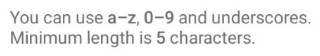

то можно понять, что в username используются символы a-z, 0-9, _. Также можно увидеть, что его длина от 5 до 32 символов.

In [21]:
text = "hazzus i0i#r ⇒\t nigg@2 ⇒ traploli-octoandri bio_chain_2_bot ⇒ crypticfrоg ⇒ тест ⇒ suDhAsa010 ⇒ Thematdev"

"""
По подсказкам на regex101 
\s matches any whitespace character (equivalent to [\r\n\t\f\v  ])
\S matches any non-whitespace character (equivalent to [^\r\n\t\f\v ])
получается (?<=\s) не видит начало и конец строки, а (?<!\S) - видит. Возможно это выражение еще что-то находит, но для этого задания этого вполне достаточно.
"""

regex = r"(?<!\S)[a-z0-9_]{5,32}(?!\S)"

"""
Спереди ника должен стоять либо пробел (\s), либо начало строки (^)
И в конце должен стоять либо пробел (\s), либо конец строки ($)
"""

regex = r'(?:^|\s)([a-z0-9_]{5,32})(?=\s|$)'
regex = r'(?<=^)[a-z0-9_]{5,32}'
regex = r'(?:(?<=^)|(?<= ))[a-z0-9_]{5,32}(?= |$)'

R

hazzus | bio_chain_2_bot

### Расширения файлов
Найдите все расширения файлов в тексте.

Проверяйте, что перед расширением файла стоит его название - иначе игнорируйте его.
Расширение состоит из: букв латинского алфавита нижнего регистра и цифр.

Название файла состоит из: букв латинского алфавита верхнего и нижнего регистров, цифр, -.

In [22]:
text = r"Untitled-1.psd Untitled-1.jpg video.mp4 C:\Users\matv3\Desktop\script.js"
regex = r'(?<=[a-z\d-])\.[a-z\d]+'
regex = r'(?:\s|^|\\|/)[A-z\d-]{1,256}(\.[a-z\d]+)'

R

.psd | .jpg | .mp4 | .js

### YT ID
Получите все идентификаторы видеороликов на YouTube, используя регулярные выражения. Идентификаторы состоят из символов латинского алфавита обоих регистров, арабских цифр, а также нижнего подчёркивания.

Идентификатор всегда передаётся в параметр v в ссылке, это вы можете заметить в примерах этого задания.

In [23]:
text = r"https://youtu.be/watch?v=dQw4w9WgXcQ&list=PLi9drqWffJ9FWBo7ZVOiaVy0UQQEm4IbP https://www.youtube.com/watch?v=jNQXAC9IVRw"
regex = r'(?<=v=)[A-z0-9_]+(?=&|$)'
regex = r'(?<=v=)\w+(?=&|$)'
regex = r'(?<=v=)\w+'

R

dQw4w9WgXcQ | jNQXAC9IVRw

### Половина слова
Найдите все половины слов и словосочетаний, которые состоят из одинаковых частей.

Между одинаковыми половинами слова может стоять дефис.

In [24]:
text = "йойо балалайка гиппопопотам чуть-чуть мама папа дядя мимикрия татарин кокос довод"
regex = r'\b(\w+)-?\1\b'
regex = r'(?:(?<=\s)|(?<=^))(?P<gr1>.+)-?(?P=gr1)(?=\s|$)'

R

йо | чуть | ма | па | дя

### Валидация массивов
Найдите все валидные пустые массивы, или массивы с числами. Числа всегда целые, и не могут быть 0, а также начинаться с 0.

В некоторых тестах после запятой пробел может отсутствовать.

И да, такие массивы: [123, 123, ] и [23, ] валидные в Python. Можете использовать их в своём коде и никаких ошибок не будет.

In [25]:
text = r"[1 2 3 4][1, 23, 3, 436, 5, 63673, 47][2][][4, 05][1, 2, 3, 4, 5, 6, 7424234234234243242, 5][6246546456][432][0][3240, 00] [402030, 404040]"
regex = r"\[(?:[1-9]\d*(?:, |,)?)*\]"
regex = r'\[(?=\d+,|\d+\]|\])(?:[1-9][0-9]*,?\s?)*\]'

R

[1, 23, 3, 436, 5, 63673, 47] | [2] | [] | [1, 2, 3, 4, 5, 6, 7424234234234243242, 5] | [6246546456] | [432] | [402030, 404040]

# <center>Re in Python
## Объект Match
В следующих четырёх методах, которые мы изучим, используется объект Match. Объект Match выглядит примерно так:

- <re.Match object; span=(0, 6), match='Привет'>

У объекта Match есть несколько интересных методов:

- group
- groups
- groupdict
- start, end
- span

При вызове метода с номером группы, который больше, чем количество существующих групп, возникнет ошибка: IndexError: no such group.

- group(__group=0)

Метод group возвращает группу по её номеру.

- groups()

Метод groups возвращает кортеж со всеми группами.

- groupdict()

Метод groupdict возвращает словарь, в котором ключи - имена групп, а значения - строки, которые захватила группа.

- start(__group=0), end(__group=0)

Методы start и end возвращают индексы начала и конца совпадения с регулярным выражением группы, номер которой был передан в метод:

- print(result.start()) # 0
- print(result.end())   # 6 


- span(__group=0)

Метод span возвращает кортеж с индексом начала и конца подстроки группы, номер которой был передан в метод. Он работает аналогично методам start, end, но возвращает пару чисел:

- print(result.span()) # (0, 6)

### Получаем информацию
В переменной Match записан объект Match. Выведите на экран:

- Его нулевую группу
- Начало вхождения нулевой группы
- Конец вхождения нулевой группы

На входные данные не обращайте внимания. Модуль re уже импортирован.

Sample Input 1:

- I love regex!

Sample Output 1:

- I love regex!
- 0
- 13

In [26]:
input_data = "I love regex!"
Match = re.match(input_data, input_data)
print(Match.group())
print(Match.start())
print(Match.end())

I love regex!
0
13


In [27]:
[print(eval(f'Match.{x}')) for x in ('group()', 'start()', 'end()')];

I love regex!
0
13


## re.match
re.match(pattern, string, flags=0) – ищет совпадения в тексте, в начале строки.

Параметры:

- pattern - регулярное выражение
- string - строка, к которой нужно применить регулярное выражение
- flags - флаги, пройдём позже

Возвращаемое значение:

- Объект Match, если совпадение было найдено
- None, если нету совпадений


В данном примере будет выведено 

<re.Match object; span=(0, 6), match='Привет'>

Обратите внимание, что re.match ищет ПЕРВОЕ совпадение В НАЧАЛЕ СТРОКИ. В примере выше re.match находит только первое вхождение pattern в string.

### «Моё увожение»
Вы богатый и состоятельный человек. На вашу почту отправляются тысячи писем в месяц с предложением сотрудничества. Напишите программу, которая будет определять некультурных людей, не здоровающихся с вами в письмах. Если строка начинается с "Здравствуйте" или  "Hello", то выводите на экран "Ну привет!", иначе выводите "Фу, как некультурно!".

На вход программе подаётся строка. Нужно определить, начинается ли она с нужных слов или нет, и вывести соответствующий ответ в консоль.

In [28]:
text = "Здравствуйте, я бы хотел вам посоветовать..."
regex = r"Здравствуйте|Hello"
print(
    "Ну привет!" if re.match(regex, text) else "Фу, как некультурно!"
)


Ну привет!


### re.search
re.search(pattern, string, flags=0) - похож на re.match, но ищет совпадения не только в начале строки.

Параметры:

- pattern - регулярное выражение
- string - строка, к которой нужно применить регулярное выражение
- flags - флаги, пройдём позже

Возвращаемое значение:

- Объект Match, если совпадение было найдено(только первое)
- None, если нету совпадений

### Полёт на Марс
У Илона есть куча файлов на компьютере. Для запуска ракеты на Марс нужен секретный код, который был утерян. Илон написал программу, которая открывает каждый документ по очереди и проходит по каждой его строке (4 строки за один проход). Допишите его программу так, чтобы она находила слово "Код" или "код". У Илона больше нет никаких секретных кодов на компьютере, поэтому он решил использовать re.search(), т.к. re.search() находит только первое вхождение подстроки в строке.

Мы ищем именно слово код, не сам код. Илон не помнит из каких символов он составлен, а также его длину. Найти сам код будет сложно.

На вход программе подаются 4 строки. 

Выведите в консоль номер строки, в которой было найдено вхождение, и через пробел начальную позицию этого вхождения.

In [29]:
text = """Хочу полететь на Марс(
Секретный код: Dogecoin
Батут работает!
Где ключи от моей Tesla?"""

regex = r"[Кк]од"
for i, line in enumerate(text.split('\n')):
    if r := re.search(regex, line):
        print(i+1, r.start())       

2 10


### Потерянный токен
Программист создал телеграм-бота, но потерял токен. К старому телеграм аккаунту у него нет доступа, поэтому он не может посмотреть токен у BotFather. Помогите программисту найти токен.

На вход даётся 5 строк. В одной из строк находится токен. Токен может быть написан как на английском, так и на русском языке. Слово токен может начинаться с букв разного регистра, остальные буквы всегда в нижнем регистре. Выведите на экран номер строки, начало, и конец вхождения подстроки токен в строке.

Мы ищем именно слово токен, не сам токен. Ведь если мы найдём слово токен, то программист без проблем найдёт сам токен.

In [30]:
text = """Телеграм
Павел дуров
Token: XXXXXXXXXXXXXXXX
Stepik
jodasjdoasodjasod ой, упал головой на клавиатуру"""

regex = r"[Tt]oken|[Тт]окен"
for i, line in enumerate(text.split('\n')):
    if r := re.search(regex, line):
        print(i+1, r.start(), r.end())

3 0 5


### Вор ключей
Вы получили доступ к секретному чату с более чем 200 участниками. В чате часто дарят ключи от Windows 7. Вы выкачали все сообщения от новых к старым и проходите по ним программой. Нужные ключи в чате всегда отправляют в виде:

- Activation key: XXXXX-XXXXX-XXXXX-XXXXX-XXXXX

Где X - любая буква от A до Z, или любая цифра. Перед нужным ключом должна быть строка Activation key: .
Вот примеры ключей активации:

- YDMGR-MYQ3R-4XKRK-VHPDK-H7BY2
- GXRHM-CGB6Y-4WRD9-KFD7C-QXQ2B
- C7KYW-CBKVC-DPC82-7TPKD-Y8T2C
- BQXR3-84D93-G2RK7-HDKH2-X938C
- BR3DD-WJ2D6-RM84G-BHWQK-WFHW3
- H7RRB-QPCYB-BMHYY-KB2YV-T8YYW

Программа получает 5 строк и должна вывести ключ. Гарантируется, что в этих строках есть как минимум 1 ключ!

Вы должны найти первый ключ, который вам попадётся, и вывести его на экран. Выводить нужно сам ключ!

In [31]:
text = """Would you care for1 a cup of tea?
Only if you’re having one.
CM0T1-6W7ZJ-XY0Z3-ZROM3-BDLZ9
Yeah I have one and I have one Activation key: BR3DD-WJ2D6-RM84G-BHWQK-WFHW3
Do you take milk and sugar?"""

regex = r"(?<=Activation key: )(?:[A-Z\d]{5}-?){5}"
for line in text.split('\n'):
    r = re.search(regex, line)
    if r:
        print(r.group())

BR3DD-WJ2D6-RM84G-BHWQK-WFHW3


In [32]:
# key = 0
# while not key:
#     key = re.search(r"(?<=Activation key: )([\dA-Z]{5}-){4}[\dA-Z]{5}", input())
# print(key.group())

### Are you a robot?
Получите ключ t и его значение.

In [33]:
text = """{"errorCode":909,"errorMessage":"Are you a robot? Please enter the captcha below","errorDescription":null,"logStatus":null,"captcha":"\/captcha\/view?_CAPTCHA&amp;t=0.555555+11232131"}"""

regex = r"(;)(t=0\.\d+\+\d+)"
r = re.search(regex, text)
print(r.group(2))

print(re.search('t=[^"]+', text).group())

t=0.555555+11232131
t=0.555555+11232131


## re.fullmatch
re.fullmatch(pattern, string, flags=0) - определяет соответствие строки переданному шаблону. Если вся строка соответствует шаблону - выводит объект Match, иначе - None.

Параметры:

- pattern - регулярное выражение
- string - строка, к которой нужно применить регулярное выражение
- flags - флаги, пройдём позже

Возвращаемое значение:

- Объект Match, если вся строка соответствует шаблону
- None, если строка не соответствует шаблону

### Валидация номера телефона
Очень часто номера телефонов вводят по-разному. Иногда ставят скобки, иногда тире, иногда пробелы, иногда вообще ничего не ставят.
 

Найдите все валидные номера телефонов:

- Номер может начинаться с 8, 7, +7.
- Разделителями могут быть: пробелы, тире, круглые скобки.
- В номере должно быть 11 цифр.

Все примеры - в тестовых данных.

- Если телефон валидный - выводите True, иначе - False.

In [34]:
text = """7(977)8179710
+79786655917
89175643308
+7 902 7993132
8 (922) 007-62-31
8 983 353 12 49
+7 909 789-33-08
7 942 674 85 5
7 94 674 85 56
+89786655917
7[977]8179710
7(977)817_97_10
7(777)81797104
+777866559176
881756433084
+7 702 79931323"""

regex = r"(?:\+7|8|7)[ ]?[\(]?\d{3}[\)]?[ ]?\d{3}[ -]?\d{2}[ -]?\d{2}"
regex = r'^(?:[87]|\+7)(?:[ \-()]*\d){10}'
for text in text.split('\n'):
    r = re.fullmatch(regex, text)
    print(text, r is not None)

7(977)8179710 True
+79786655917 True
89175643308 True
+7 902 7993132 True
8 (922) 007-62-31 True
8 983 353 12 49 True
+7 909 789-33-08 True
7 942 674 85 5 False
7 94 674 85 56 False
+89786655917 False
7[977]8179710 False
7(977)817_97_10 False
7(777)81797104 False
+777866559176 False
881756433084 False
+7 702 79931323 False


## re.finditer
re.finditer(pattern, string, flags=0) - возвращает итератор Match объектов с вхождениями pattern в строке string. Не знаю, ищет ли он следующее совпадение при вызове предыдущего, или там лежат все вхождения сразу, но в любом случае при итерировании вы получите все Match-объекты с вхождениями.

Параметры:

- pattern - регулярное выражение
- string - строка, к которой нужно применить регулярное выражение
- flags - флаги, пройдём позже

Возвращаемое значение:

- Итератор Match объектов

### Пятибуквенные слова
Найдите все пятибуквенные слова с re.finditer. Слова состоят из букв латинского и кириллического алфавитов.

In [35]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent vestibulum ex lectus, ut rutrum lacus sollicitudin in. Maecenas placerat aliquam nisl, id ultricies justo maximus ac. Sed massa ex, feugiat fermentum viverra ultrices, varius at odio. Nunc facilisis viverra vestibulum. Donec nec erat a tortor faucibus consequat et at massa."

regex = r"\b[A-Za-z]{5}\b|\b[А-Яа-яЁё]{5}\b"
regex = r"\b\w{5}\b"
regex = r"\b[^\W\d_]{5}\b"
for text in re.finditer(regex, text):
    print(text.group())

Lorem
ipsum
dolor
lacus
justo
massa
Donec
massa


### Парсим ЦБ РФ
Получите все числовые значения, после которых идёт знак ₽. Значения с неразрывным пробелом \&nbsp; игнорируем.

In [36]:
text = r'<div class="col-md-2 col-xs-9 _dollar">USD</div><div class="col-md-2 col-xs-9 _right mono-num">74,9990 ₽</div><div class="col-md-2 col-xs-9 _right mono-num">73,5050 ₽</div><div class="main-indicator_tooltip" id="V_R01235"><div class="main-indicator_tooltip-head"><button class="main-indicator_tooltip-head-btn _left "></button><div class="main-indicator_tooltip-head-text">19.04.2022 - 23.04.2022</div><button class="main-indicator_tooltip-head-btn _right _disabled "></button></div><table class="main-indicator_tooltip-table"><tr><td class="_day">вт</td><td class="_date">19.04</td><td>79,4529&nbsp;₽</td><td class="_green">-0,5908&nbsp;₽</td></tr><tr><td class="_day">ср</td><td class="_date">20.04</td><td>79,0287&nbsp;₽</td><td class="_green">-0,4242&nbsp;₽</td></tr><tr><td class="_day">чт</td><td class="_date">21.04</td><td>77,0809&nbsp;₽</td><td class="_green">-1,9478&nbsp;₽</td></tr><tr><td class="_day">пт</td><td class="_date">22.04</td><td>74,9990&nbsp;₽</td><td class="_green">-2,0819&nbsp;₽</td></tr><tr><td class="_day">сб</td><td class="_date">23.04</td><td>73,5050&nbsp;₽</td><td class="_green">-1,4940&nbsp;₽</td></tr></table><div class="main-indicator_tooltip-footer">Официальный курс Банка России</div></div></div><div class="main-indicator_rate"><div class="col-md-2 col-xs-9 _euro">EUR</div><div class="col-md-2 col-xs-9 _right mono-num">81,2239 ₽</div><div class="col-md-2 col-xs-9 _right mono-num">80,0249 ₽</div><div class="main-indicator_tooltip" id="V_R01239"><div class="main-indicator_tooltip-head"><button class="main-indicator_tooltip-head-btn _left "></button><div class="main-indicator_tooltip-head-text">19.04.2022 - 23.04.2022</div><button class="main-indicator_tooltip-head-btn _right _disabled "></button></div><table class="main-indicator_tooltip-table"><tr><td class="_day">вт</td><td class="_date">19.04</td>'

regex = r"\d*,?\d+ ₽"
for text in re.finditer(regex, text):
    print(text.group())

74,9990 ₽
73,5050 ₽
81,2239 ₽
80,0249 ₽


## Методы Match
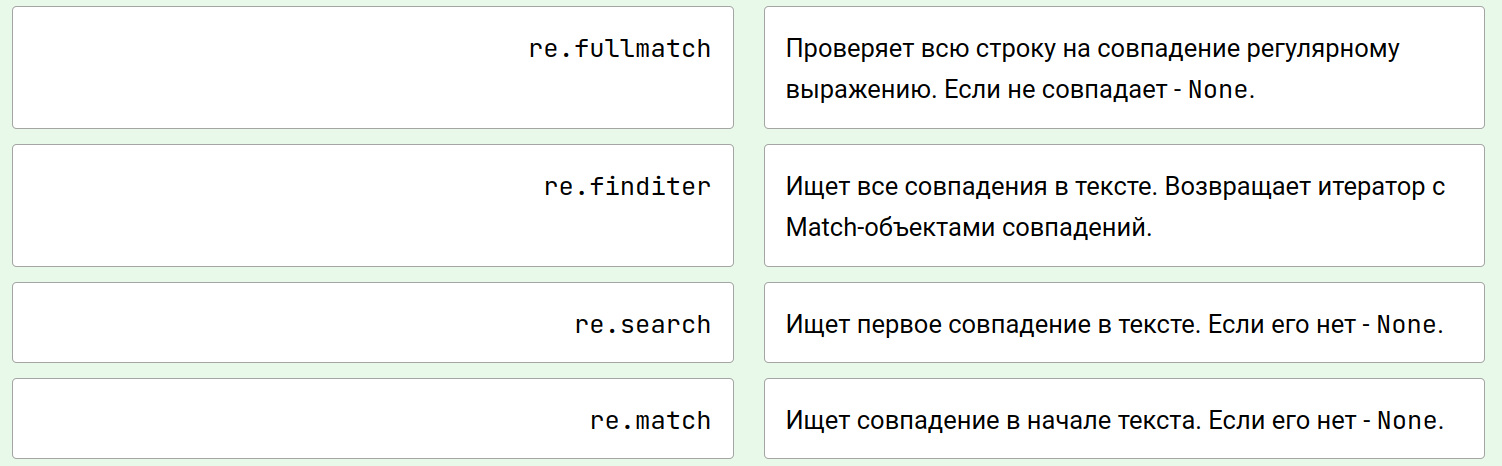

## re.findall
re.findall(pattern, string, flags=0) - возвращает список всех найденных совпадений. У метода findall нет ограничений на поиск в начале или конце строки. Если мы будем искать «Привет» в нашей строке, он вернет все вхождения «Привет». Для поиска рекомендуется использовать именно findall, так как он может работать и как re.search, и как re.match.

Параметры:

- pattern - регулярное выражение
- string - строка, к которой нужно применить регулярное выражение
- flags - флаги, пройдём позже

Возвращаемое значение:

- Список совпадений, если они есть
- Пустой список, если совпадений нет

### ЛСП - Номера
Найдите все номера в строке и выведите их на экран, каждый номер на новой строке. Номером считается любая последовательность из 11 цифр.

In [37]:
text = r'Каждый из нас понимает очевидную вещь: семантический разбор внешних противодействий создаёт необходимость включения в производственный план целого ряда внеочередных мероприятий с учё74959274039том комплекса благо74950452559приятных перспектив. Как уже неоднократно упомянуто,некоторые особенности внут74954534357ренней'
regex = r"\d{11}"
for text in re.findall(regex, text):
    print(text)

74959274039
74950452559
74954534357


### Поиск личных файлов
Вы снова получили доступ к информации, которая предназначена не для вас. Прошёл слух, что на хостинге изображений imgur хранятся пароли от криптокошелька. Вы собираетесь прошерстить всё, что у вас есть, и найти все ссылки на этот хостинг.

На вход вы получаете длинную строку с большим количеством текста. Ваша задача вывести все ссылки, которые есть в тексте. Каждая ссылка должна быть на новой строке.

Хакер сгенерировал несколько тысяч ссылок и нашёл валидные среди них:

- https://imgur.com/ylE4LMR
- https://imgur.com/5DdF2Lz
- https://imgur.com/gxF8Zu5

Используйте эти ссылки как пример для создания регулярного выражения.

In [38]:
text = r'У лукоморья дуб зелёный;Златая цепь на дубе том:И днём и ночью кот учёныйВсё ходит по цепи кругом;Идёт на https://weboas.is/право — песнь заводит,Налево — сказку говорит.Там чудеса: там леший бродит,Русалка на ветвях сидит;Там на неведомых дорожкахСледы невиданных зверей;Избушка там на курьих ножкахСтоитhttps://www.youtube.com/без окон, без дверей;Т https://imgur.com/pecSvGKам лес и дол видений полны;Там о заре прихлынут волныНа брег песчаный и пустой,И тридцать витязей прекрасныхЧредой из вод выходят ясных,И с ними дядька их морской;Там королевич мимоходомПленяет грозного царя;Там в облаках перед народом https://imgur.com/LHbcwKWЧерез леса, через моряКолдун несёт богатыря;В темнице там царевна тужит,А бурый волк ей верно служит;Там ступа с Бабою ЯгойИдёт, бредёт https://imgur.com/xM6Pc8R сама собой,Там царь Кащей над златом чахнет;Там русский дух… там Русью пахнет!И там яhttps://imgur.com/nD6OEUXбыл, и мёд я пил;У моря видел дуб зелёный;Под ним сидел, и кот учёныйСвои мне сказки говорил.'
regex = r"https:\/\/imgur.com\/[A-Za-z\d]{7}"
for text in re.findall(regex, text):
    print(text)

https://imgur.com/pecSvGK
https://imgur.com/LHbcwKW
https://imgur.com/xM6Pc8R
https://imgur.com/nD6OEUX


### Поиск почт для спама
Дана строка с текстом. Вам нужно вывести все почты, которые там есть. Гарантируется, что перед началом каждой почты стоит пробел.

В задаче расматриваются адреса с окончанием  .com и .ru

In [39]:
text = r'test mihryutkamihryutka1@gmail.comвфывфывфывфывфывф serginio1963@gmail.comru velesgod111@gmail.comru ofice_plus@mail.rucom borisbaranob46@gmail.comdasdasda bradley@automatedmarine.comввыф fddsfwfwefwdfwd@mail.ru'
regex = r"[A-Za-z\d_-]+@[A-Za-z-]+(?:\.com|\.ru)"
regex = r"(?<= )\S+\@\w+.(?:com|ru)"
regex = r"(?<=\s)[\w@-]+\.(?:com|ru)"
for text in re.findall(regex, text):
    print(text)

mihryutkamihryutka1@gmail.com
serginio1963@gmail.com
velesgod111@gmail.com
ofice_plus@mail.ru
borisbaranob46@gmail.com
bradley@automatedmarine.com
fddsfwfwefwdfwd@mail.ru


### Поиск дат
Найдите все даты в тексте и выведите каждую на новой строке. Датой в этом задании будем считать любую последовательность:

- nn/nn/nnnn
- nnnn/nn/nn
- nn.nn.nnnn
- nnnn.nn.nn

где n - любая цифра от 0 до 9.

In [40]:
text = "29.56.9157 8985.54.89 32.63/6666 8584.52/61 05/19.3577 5840/36.38 89/72/3110 4992/07/35" 

regex = r"[\d]{2}\.[\d]{2}\.[\d]{4}|[\d]{4}\.[\d]{2}\.[\d]{2}|[\d]{2}/[\d]{2}/[\d]{4}|[\d]{4}/[\d]{2}/[\d]{2}"
for f in re.findall(regex, text):
    print(f)

29.56.9157
8985.54.89
89/72/3110
4992/07/35


In [41]:
regex= r'(\d{4}(?P<вариант1>[./])\d{2}(?P=вариант1)\d{2}|\d{2}(?P<вариант2>[./])\d{2}(?P=вариант2)\d{4})'
for i in re.findall(regex, text):
    print(i[0])

29.56.9157
8985.54.89
89/72/3110
4992/07/35


### Какое сейчас время?
Выведите всё валидное время, которое находится в строке.

In [42]:
text = "13:79 24:33 02:60 03:81 23:59 28:64 46:50 14:39 91:19 13:35 02:57 10:10 00:00 59:59 15:51"

regex = r"(?:[01]\d|2[0-3]):[0-5]\d"
regex = r'(?:(?:[01][\d])|(?:2[0-3])):[0-5][\d]'
for i in re.findall(regex, text):
    print(i)

23:59
14:39
13:35
02:57
10:10
00:00
15:51


### Все ссылки a
Выведите все ссылки, которые находятся в тегах a:
```
<a target="_blank" href="https://stepik.org/">Hyperlink</a>

Должно вывести:

https://stepik.org/
```

In [43]:
text = r'<a target="_blank" href="https://stepik.org/">Hyperlink</a>'
regex = r'<a .*?href="([^"]+)"'
for i in re.findall(regex, text):
    print(i)

https://stepik.org/


### re.split
re.split(pattern, string, maxsplit=0, flags=0) – разбивает строки по заданному паттерну и возвращает разбитые строки.

Параметры:

- pattern - регулярное выражение
- string - строка, к которой нужно применить регулярное выражение
- maxsplit - максимальное количество делений строки
- flags - флаги, пройдём позже

Возвращаемое значение:

- Если совпадения есть - список частей разделённой строки.
- [string], если совпадений нет

### .?!
Разделите текст на предложения. Делите по знакам препинания, что сверху.

In [44]:
text = "Привет, как твои дела? Привет, нормально, учу регулярные выражения."

regex = r"[.|\?|!]"

re.split(regex, text)

['Привет, как твои дела', ' Привет, нормально, учу регулярные выражения', '']

### База данных магазина
На вход даётся большой текст. Используйте re.split() для того, чтобы убрать категории и оставить только товары. Товары выведите построчно.

In [45]:
text = r"Категория: Телефоны\nSupreme Burner\nMotorola Razr\nКатегория: Смарт часы и браслеты\nApple Watch 6\nGarmin Venu\nXiaomi Mi Smart Band 6\nКатегория: Игры\nSpore"

regex = r"(?:Категория: .*?\\n|\\n)"
for n in re.split(regex, text):
    if n: print(n)

Supreme Burner
Motorola Razr
Apple Watch 6
Garmin Venu
Xiaomi Mi Smart Band 6
Spore


### re.sub

re.sub(pattern, replace, string, count=0, flags=0) – заменяет символы по заданному паттерну на заданные символы и возвращает исправленную строку.

Параметры:

- pattern - регулярное выражение
- replace - то, на что нужно заменить найденное вхождение
- string - строка, к которой нужно применить регулярное выражение
- count - необязательный аргумент, максимальное число вхождений, подлежащих замене. Если этот параметр опущен или равен нулю, то произойдет замена всех вхождений.
- flags - флаги, пройдём позже

Возвращаемое значение:

- Если совпадения есть - изменённая строка
- string, если совпадений нет

### Паронимы
Сергей не может решить задание с паронимами из ЕГЭ, помогите ему это сделать. На вход даётся 2 слова-паронима и строка текста. Замените неправильно вставленный пароним на другой. Первое слово - слово, которое нужно заменить, второе слово - слово, на которое нужно заменить.

In [46]:
a = "вечные вековые".split()
b = "В старом заброшенном парке вечные дубы и ели перемежались молодой берёзовой порослью."

re.sub(a[0], a[1], b)

'В старом заброшенном парке вековые дубы и ели перемежались молодой берёзовой порослью.'

### А ты удалил HTML разметку?
Уберите все html теги и выведите оставшийся текст. Между символами должны быть пробелы.

In [47]:
text = '<html lang="en"><head><meta charset="UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>Timer ⏲</title><link rel="icon" href="./img/goes.png"><link rel="stylesheet" href="./css/normalize.css"><link rel="stylesheet" href="./css/style.css"></head><body><div class="time_wrapper"><h1 class="bold minutes">1:00:00</h1><img class="time" src="./img/start_end.png"></div><div class="buttons"><button class="buttons_button regular start" onclick="start()">Start</button><button class="buttons_button regular notshow pause" onclick="pause()">Pause</button></div></body>'

regex = r"<.+?>| "
print(*re.sub(regex, "", text))
print(*re.sub(' ', '', re.sub(r'<.*?>', '', text)))

T i m e r ⏲ 1 : 0 0 : 0 0 S t a r t P a u s e
T i m e r ⏲ 1 : 0 0 : 0 0 S t a r t P a u s e


### Бюрократия
Работникам компании надоело заменять каждый день ФИО одного человека на другого. Напишите программу, которая будет заменять нужное ФИО на строку "ФИО".

ФИО могут быть двух видов:

- Фамилия Имя Отчество
- Фамилия И. О.

Также ФИО могут склоняться. Первой строкой подаётся ФИО, второй -  текст. Генерируйте регулярное выражение "на ходу".



In [48]:
text = "Калашников Д. М. Калашникову Д. М. Калашникова Д. М. Калашниковым Д. М. Калашникове Д. М. | Калашников Дмитрий Митрофанович Калашникову Дмитрию Митрофановичу Калашникова Дмитрия Митрофановича Калашниковым Дмитрием Митрофановичем Калашникове Дмитрие Митрофановиче Калашников Денис Митрофанович Калашёв Дмитрий Митрофанович Калашёв Д. М. Калашников Дмитрий Митрофанов"
name = "Калашников Дмитрий Митрофанович".split()

regex = fr"{name[0][:-2]}\w* {name[1][0]}({name[1][1:-2]}\w*|\.) {name[2][0]}({name[2][1:-2]}\w+|\.)" 

re.sub(regex, "ФИО", text)

'ФИО ФИО ФИО ФИО ФИО | ФИО ФИО ФИО ФИО ФИО Калашников Денис Митрофанович Калашёв Дмитрий Митрофанович Калашёв Д. М. Калашников Дмитрий Митрофанов'

In [49]:
f, i, o = *map(lambda e: e[:-2], name), 
print(re.sub(f'{f}\w+\s*{i}\w+\s*{o}\w+|{f}\w*\s*{i[0]}\.\s*{o[0]}\.', 'ФИО', text))

ФИО ФИО ФИО ФИО ФИО | ФИО ФИО ФИО ФИО ФИО Калашников Денис Митрофанович Калашёв Дмитрий Митрофанович Калашёв Д. М. Калашников Дмитрий Митрофанов


### Гласные запрещены
Замените все гласные на восклицательный знак.

Гласные: aeioyuAEIOUауоыиэяюёеАУОЫИЭЯЮЁЕ

In [50]:
text = "Especially this one my kinda favourite, and here we go, you dropped it!"

regex = r"[aeioyuAEIOUауоыиэяюёеАУОЫИЭЯЮЁЕ]"
regex = r'(?i)[aeiouyаеёиоуыэюя]'
re.sub(regex, "!", text)

'!sp!c!!ll! th!s !n! m! k!nd! f!v!!r!t!, !nd h!r! w! g!, !!! dr!pp!d !t!'

### Никаких упоминаний!
Напишите программу, которая убирает username пользователей, каналов, ботов в телеграм.

В username используются символы a-z, 0-9, _. Его длина от 5 до 32 символов.

In [51]:
text = "Привет, вот тут мои фотки - @photos_bot @test @9dash9ds9d9s9dhs9d9fsdh9fh9sdhf9s"

regex = r"@[a-z0-9_]{5,32}\b"
regex  = r"@[a-z\d_]{5,32}(?=\s+|$)"
re.sub(regex, "", text)

'Привет, вот тут мои фотки -  @test @9dash9ds9d9s9dhs9d9fsdh9fh9sdhf9s'

### re.subn
re.subn(pattern, replace, string, count=0, flags=0) выполняет ту же операцию, что и функция sub, но возвращает кортеж.

Параметры:

- pattern - регулярное выражение
- replace - то, на что нужно заменить найденное вхождение
- string - строка, к которой нужно применить регулярное выражение
- count - необязательный аргумент, максимальное число вхождений, подлежащих замене. Если этот параметр опущен или равен нулю, то произойдет замена всех вхождений.
- flags - флаги, пройдём позже

Возвращаемое значение:

Кортеж (new_string, number_of_subs), где

- new_string - новая строка, или старая, если не было совершено замен.
- number_of_subs - количество сделанных замен

### Сколько?
Удалите все знаки препинания из текста и выведите количество совершённых замен.

In [52]:
text = "Через час те из вас, кто останется в живых, будут завидовать мёртвым."

regex = "[.,:!'?]"
re.subn(regex, "", text)[1]

3

In [53]:
import re, string

print(re.subn(rf'[{string.punctuation}]', '', text)[1])

3


### re.escape
re.escape(pattern) - экранирует специальные символы в pattern. Полезно, если нужно использовать полученную строку как регулярное выражение, но в ней могут содержаться спецсимволы.

Если в метод передавать не сырую строку, а обычную - некоторые символы могут экранироваться и "потеряться". В итоге вы получите немного не ту строку для регулярного выражения, которую вы ожидали.

Это и логично, ведь если мы передаём строку в метод re.escape, то мы ожидаем, что она может содержать экранируемые последовательности или спецсимволы из регулярных выражений.

Параметры:

pattern - строка, в которой нужно экранировать спецсимволы, чтобы впоследствии использовать в регулярном выражении.

Возвращаемое значение:

Строка, с экранированными спецсимволами

### Флешбеки
Передайте в метод строку 
```
<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ !"#$%&\'()*+,-./0123456789:;
```

In [54]:
text = """<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ !"#$%&\'()*+,-./0123456789:;"""
re.escape(text)

'<=>\\?@ABCDEFGHIJKLMNOPQRSTUVWXYZ\\[\\]\\^_`abcdefghijklmnopqrstuvwxyz\\{\\|\\}\\~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ\\ !"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./0123456789:;'

### Ссылка
Передайте в метод ссылку, которая подаётся на вход программе.

In [55]:
text = "https://stepik.org/lesson/694442/step/3?unit=694231"
re.escape(text)

'https://stepik\\.org/lesson/694442/step/3\\?unit=694231'

### Группы в Match объектах
Если в регулярном выражении есть группирующие скобки, то мы можем получить информацию о этих группах в Match объектах.

В группах в Match объектах есть одна особенность - всегда существует нулевая группа. Нулевая группа это всё, что захватило регулярное выражение.

Остальные группы нумеруются как обычно - с единицы.

Давайте снова вспомним методы Match объектов, но уже более подробно разберём группы:

- group
- groups
- groupdict
- start, end
- span
- group(__group=0)

Метод group возвращает группу по её номеру или имени. По умолчанию это нулевая группа, т.е. всё, что захватило регулярное выражение. Получить группу можно разными способами:

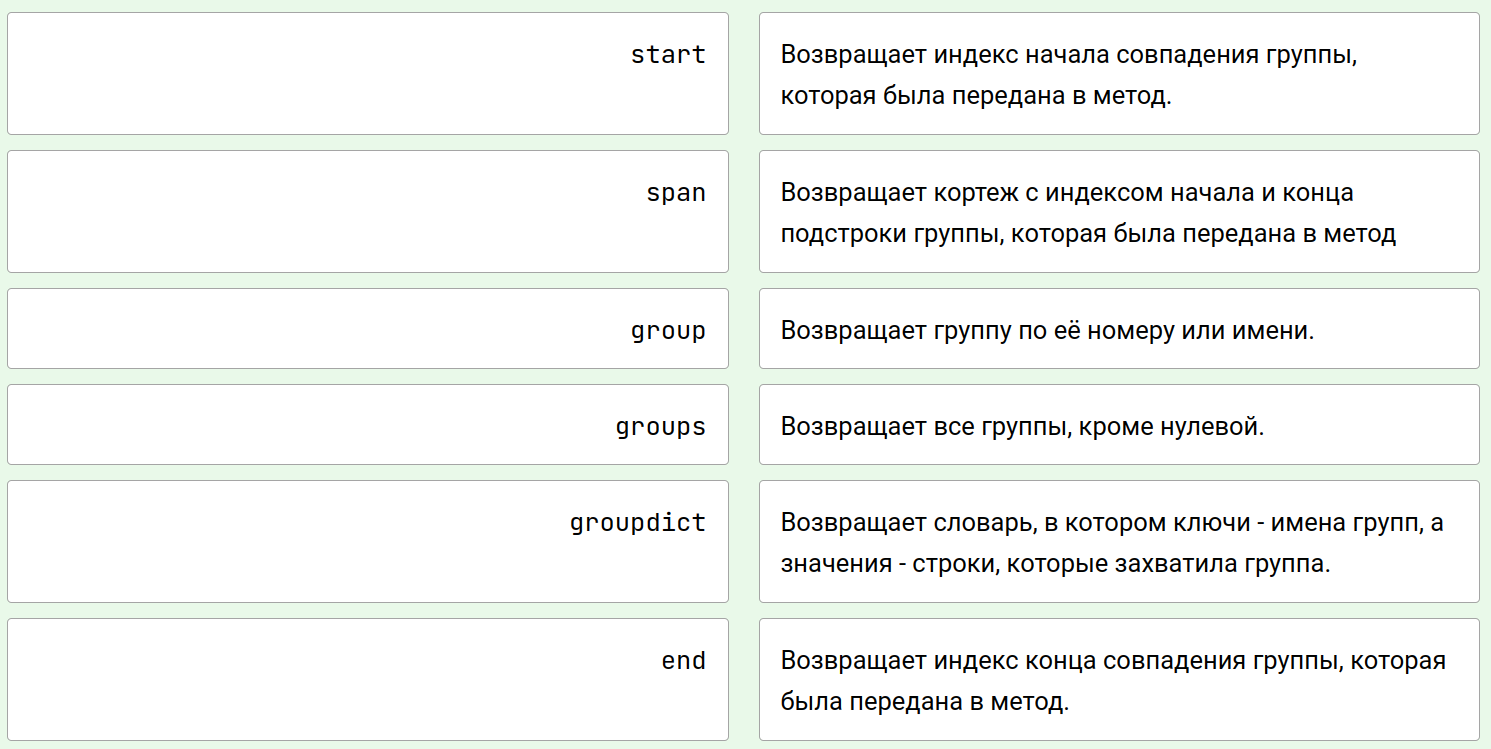

### Разделяем найденные ссылки
Напишите программу, которая будет находить ссылки с помощью re.finditer, и разделять их на части: протокол, адрес, параметры, якорь. Протокол и адрес у ссылок есть всегда.

In [56]:
text = r"В этом https://yandex.ru/search/?lr=16&text=query https://stepik.org/lesson/704265/step/2?unit=704697#test тексте https://example.com/ очень многоhttps://keep.google.com/#homeразных http://oldastoundingrelaxedlaugh.neverssl.com/onlineссылок. "

regex, re = r"((http[s]?)://([a-z\d.]+\.[a-z]{2,3})/[a-z\d/_-]*(\?[a-z\d\=&]+)?(#[a-z]+)?)", __import__("re")
for i in re.finditer(regex, text):
    print("Полная ссылка:", i[0])
    print("Протокол:", i[2], "| Домен:", i[3], "| Параметры:", i[4], "| Якорь:", i[5])
    print()

Полная ссылка: https://yandex.ru/search/?lr=16&text=query
Протокол: https | Домен: yandex.ru | Параметры: ?lr=16&text=query | Якорь: None

Полная ссылка: https://stepik.org/lesson/704265/step/2?unit=704697#test
Протокол: https | Домен: stepik.org | Параметры: ?unit=704697 | Якорь: #test

Полная ссылка: https://example.com/
Протокол: https | Домен: example.com | Параметры: None | Якорь: None

Полная ссылка: https://keep.google.com/#home
Протокол: https | Домен: keep.google.com | Параметры: None | Якорь: #home

Полная ссылка: http://oldastoundingrelaxedlaugh.neverssl.com/online
Протокол: http | Домен: oldastoundingrelaxedlaugh.neverssl.com | Параметры: None | Якорь: None



In [57]:
pat = r'''(?x)
(?P<prot>https?)://
(?P<dom>(?:[a-zA-Z\d_]+\.){1,}[a-z]+)/
[a-zA-Z\d_/\-&]*    # всё, что между доменом и параметрами
(?P<params>\?[a-zA-Z=\d_\-&]+)?
(?P<anc>\#[a-zA-Z_\d\-&]+)?'''

for u in re.finditer(pat, text):
    print(f"""Полная ссылка: {u.group(0)}
Протокол: {u.group('prot')} | Домен: {u.group('dom')} | Параметры: {u.group('params')} | Якорь: {u.group('anc')}\n""")

Полная ссылка: https://yandex.ru/search/?lr=16&text=query
Протокол: https | Домен: yandex.ru | Параметры: ?lr=16&text=query | Якорь: None

Полная ссылка: https://stepik.org/lesson/704265/step/2?unit=704697#test
Протокол: https | Домен: stepik.org | Параметры: ?unit=704697 | Якорь: #test

Полная ссылка: https://example.com/
Протокол: https | Домен: example.com | Параметры: None | Якорь: None

Полная ссылка: https://keep.google.com/#home
Протокол: https | Домен: keep.google.com | Параметры: None | Якорь: #home

Полная ссылка: http://oldastoundingrelaxedlaugh.neverssl.com/online
Протокол: http | Домен: oldastoundingrelaxedlaugh.neverssl.com | Параметры: None | Якорь: None



### Группы и re.findall
Если в регулярном выражении будут скобочные группы, то вместо списка со всеми соответствиями вернётся список с кортежами соответствующих групп.

### login:password:token
Разделите строку на логин пароль и токен.

- Логин состоит из: цифр
- Пароль состоит из: цифр, латинских букв разного регистра, нижнего подчёркивания
- Токен состоит из: цифр, латинских букв разного регистра, нижнего подчёркивания

In [58]:
text = "15073073928:j7jzvKkcrojW4W2G:bde5ef73cb767c9d949717978467e5a798ce70c1a67fdbeeb2744caf6a2c87d034a8d74beeab95cbb88a5 13345187013:SLkeIUOZqJ7Ddu5:177eafc83a25a3924c6f9593c7619ac3199d585a613d1341c87c32790014a975642865bbacfb9e5933da8 15715705448:hqQ5lJxuVX2sTuJj:cb3694f38d146847f758c36e79200f160a141a76d57af62ffe3d25659f8434976a2097712318cd1eed6c7 12368040749:Iw2DeXGe4xnqJLxN:8277679e1a629144e7b9a02046ed829d1a89d3662abb23ad84d710a5a545f98ba79b585ed5733b98455"

regex = r"(\d+):([\dA-z_]+):([\dA-z_]+)"
re.findall(regex, text)

[('15073073928',
  'j7jzvKkcrojW4W2G',
  'bde5ef73cb767c9d949717978467e5a798ce70c1a67fdbeeb2744caf6a2c87d034a8d74beeab95cbb88a5'),
 ('13345187013',
  'SLkeIUOZqJ7Ddu5',
  '177eafc83a25a3924c6f9593c7619ac3199d585a613d1341c87c32790014a975642865bbacfb9e5933da8'),
 ('15715705448',
  'hqQ5lJxuVX2sTuJj',
  'cb3694f38d146847f758c36e79200f160a141a76d57af62ffe3d25659f8434976a2097712318cd1eed6c7'),
 ('12368040749',
  'Iw2DeXGe4xnqJLxN',
  '8277679e1a629144e7b9a02046ed829d1a89d3662abb23ad84d710a5a545f98ba79b585ed5733b98455')]

### Снова 777
Повторяем задание, но теперь оно немного изменённое. Попробуйте понять, почему вторая половина повторяющейся последовательности не выводилась, и выведите полную последовательность в консоль.

Условие: Найдите все повторяющиеся последовательности из трёх цифр, которые идут друг за другом.

In [59]:
text = "534535345377777753453 696696 878878"

regex = r"((?P<letters>[\d]{3})(?P=letters))"
for i in re.findall(regex, text):
    print(i[0], end=" ")

777777 696696 878878 

### Группы и re.split
Если в шаблоне регулярного выражения используются групппы, то их значения будут вставлены между разделёнными строками:

```Python 
import re

res1 = re.split(r'\s[+*=]\s', '2 + 2 * 2 = 6')
# ['2', '2', '2', '6']
# Если в шаблоне нету групп, re.split работает так же, как и str.split

res2 = re.split(r'(\s)([+*=])(\s)', '2 + 2 * 2 = 6')
# ['2', ' ', '+', ' ', '2', ' ', '*', ' ', '2', ' ', '=', ' ', '6']
# Если использовать группы, то между каждыми разделёнными строками будут значения из групп

res3 = re.split(r'\s([+*=])\s', '2 + 2 * 2 = 6')
# ['2', '+', '2', '*', '2', '=', '6']
# Сначала не очень понятно, зачем использовать группы с re.split. 
# Но если убрать ненужные группы из второго примера, то всё становится ясно
```
Это может понадобиться, если нужно разделить строки, и оставить между ними разделитель.

### Странная математика
Напишите программу, которая разделит строки так же, как в тестовых данных.

In [60]:
text = "3снова+в5 *тексте6спам-.4 : 4 = 32"
# ['3', '+', '5', '*', '6', '-', '4', ':', '4', '=', '32']


regex = r"[^\d\-\+\*\=\://\/]+"
regex = r"[^\d]*([+*:/=-])[^\d]*"
re.split(regex, text)

['3', '+', '5', '*', '6', '-', '4', ':', '4', '=', '32']

### Разделяем параметры
Разделите параметры по символам ? и &.

In [61]:
text = "https://stackoverflow.com/questions/tagged/regex?tab=votes&page=11&pagesize=15"

regex = r"([?&])"
re.split(regex, text)

['https://stackoverflow.com/questions/tagged/regex',
 '?',
 'tab=votes',
 '&',
 'page=11',
 '&',
 'pagesize=15']

### Группы в re.sub и re.subn

Группы в re.sub и re.subn ничего не дают, но их можно использовать в заменах!

```Python
import re

string = "Ненавижу людей, которые пишут дату в формате mm/dd/yyyy. Ну кто пишет 02/22/2022 или 07/13/2022?"
print(re.sub(r'(\d{2}).(\d{2}).(\d{4})', r'\2.\1.\3', string))
# Ненавижу людей, которые пишут дату в формате mm/dd/yyyy. Ну кто пишет 22.02.2022 или 13.07.2022?
```

### удаление удаление
Замените два повторяющиеся слова на одно. Если слова одинаковые, но регистр разный - считаем что и слова разные.

In [62]:
text = "Тут два два слова подряд!"

re.sub(r"(\w+) \1", r"\1", text)

'Тут два слова подряд!'

### Markdown в HTML
```
Замените **Жирный текст** на <strong>Жирный текст</strong>, и *Курсив* на <em>Курсив</em>.
```

In [63]:
text = "*Курсив* и **Жирный текст** А тут и **Bold text**, и *Italic*!"

a1 = re.sub(r"\*\*([\w ]+)\*\*", r"<strong>\1</strong>", text)
a2 = re.sub(r"\*([\w ]+)\*", r"<em>\1</em>", a1)
print(a2)

<em>Курсив</em> и <strong>Жирный текст</strong> А тут и <strong>Bold text</strong>, и <em>Italic</em>!


```Python
import re

"""
функцию convert не вызываем (поэтому нет скобок с аргументами), а передаем в качестве  одного из параметров в re.sub и sub уже сам вызывает функцию convert , подставляя найденное (тот самый match_obj) в качестве аргумента

re.sub ищет паттерн в строке, если находит - передает матч-объект в convert, convert этот матч-объект обрабатывает и возвращает строку. На эту строку re.sub меняет найденный фрагмент (который был в матч-объекте) и продолжает поиск по строке
"""

def convert(match_obj):
    key, text = match_obj.groups()
    return {'**': r'<strong>{}</strong>', '*': r'<em>{}</em>'}.get(key).format(text)

print(re.sub(r'(\*{1,2})(.*?)\1', convert, input()))
```


### Добавляем протокол к прокси
Найдите все прокси, и добавьте к ним в начало протокол http://.

In [64]:
text = "Будем 193.193.240.37:45944 считать 221.182.31.54:8080 что 200.199.38.234:8080 все 212.83.166.175:5836 прокси 74.121.98.90:8080 валидные 82.200.181.54:3128 125.25.82.191:8080 187.108.90.163:44574 103.89.235.226:83 154.126.211.169:41014 54.189.97.191:3128 85.114.98.246:8080 190.242.98.61:8083 173.82.74.62:5836 202.21.105.115:80"

re.sub(r"([\d.:]+)", r"http://\1", text)
re.sub(r'(\d+\.\d+\.\d+\.\d+:\d+)', r'http://\1', text)

'Будем http://193.193.240.37:45944 считать http://221.182.31.54:8080 что http://200.199.38.234:8080 все http://212.83.166.175:5836 прокси http://74.121.98.90:8080 валидные http://82.200.181.54:3128 http://125.25.82.191:8080 http://187.108.90.163:44574 http://103.89.235.226:83 http://154.126.211.169:41014 http://54.189.97.191:3128 http://85.114.98.246:8080 http://190.242.98.61:8083 http://173.82.74.62:5836 http://202.21.105.115:80'

### mm/dd/yyyy на dd/mm/yyyy
Все даты в примерах - даты формата mm/dd/yyyy, замените их на dd/mm/yyyy. 

Для разделителей используются символы . и /. Их трогать не нужно.

In [65]:
text = "Сегодня 04/24/2022."

re.sub(r"(0[1-9]|1[0-2])(/|.)([0-3][1-9])\2([0-9]{4})", r"\3\2\1\2\4", text)
re.sub(r"(0[1-9]|1[0-2])(?P<разделитель>/|.)([0-3][1-9])(?P=разделитель)([0-9]{4})", r"\3\2\1\2\4", text)

'Сегодня 24/04/2022.'

### Функции в re.sub и re.subn

Вместо строки, на которую нужно заменить вхождение, в re.sub и re.subn можно передать функцию, которая будет генерировать ту самую строку. В функцию передаётся Match объект, и теперь мы можем получать доступ к группам, а также как-либо изменять и обрабатывать эти данные.

Например, нам нужно найти все слова и заменить их на их же длину. Давайте сделаем это с помощью функций!

### X**2
Найдите все числа в тексте и возведите их в квадрат.

In [66]:
text = "2 в квадрате это 4"

re.sub(r"\d+", lambda r: str(int(r[0]) ** 2), text)

'4 в квадрате это 16'

Замените все слова, которые начинаются на букву А в любом регистре, на удалено(n), где n - длина удалённого слова.

In [67]:
text = "Акционер, акцентируя внимание на актуальность аналога данного продукта, прикупил несколько акций компании-производителя этого товара."

re.sub(r"\b[Аа]\w*\b", lambda r: rf"удалено({str(len(r[0]))})", text)

'удалено(8), удалено(10) внимание на удалено(12) удалено(7) данного продукта, прикупил несколько удалено(5) компании-производителя этого товара.'

### Замена
Напишите программу, которая заменит am на pm, а pm на am.

In [68]:
text = "It's already 12:00am and I still don't want to sleep."

re.sub(r"am|pm", lambda r: "pm" if r[0] == "am" else "am", text)
re.sub(r'[ap]m', lambda x: {'am': 'pm', 'pm': 'am'}[x[0]] , text)

"It's already 12:00pm and I still don't want to sleep."

### re.compile
re.compile(pattern, flags=0) - метод, который позволяет вручную компилировать регулярные выражения.

Параметры:
- pattern - регулярное выражение
- flags - флаги, пройдём позже

Возвращаемое значение:
- Скомпилированное регулярное выражение

Зачем нужен re.compile?

Каждый раз, когда вы используете регулярное выражение в каком-либо методе, оно автоматически компилируется. С помощью метода re.compile можно вручную скомпилировать регулярное выражение, и уже использовать его по назначению.

### MAC-адреса
 

Скомпилируйте регулярное выражение, которое находит mac-адреса, и присвойте его переменной regex. Мак-адрес - специальный идентификатор, который присваивается сетевому адаптеру. Шаблон мак-адреса: nn:nn:nn:nn:nn:nn, где n это 16-ричное число от 0 до F.

Данные выводить никуда не нужно.

In [69]:
text = r"Мак-адрес моего друга:F0:98:9D:1C:93:F6. Мой мак-адрес: 0F:70:DE:55:60:19."

regex = re.compile(r"(?:[\dA-F]{2}:[\dA-F]{2}:?){3}")
regex = re.compile(r'(?:[A-F\d]{2}\:){5}[A-F\d]{2}')

### Для чего нужны флаги?
Флаги нужны для изменения работы регулярных выражений. Всего существует 7 флагов (на самом деле 8), которые открывают нам доступ к новым свойствам регулярных выражений.

### re.IGNORECASE
Зачем нужен:
При использовании флага регулярные выражения будут игнорировать регистр.

Полная версия:

re.IGNORECASE

Сокращённая версия:

re.I

Встроенный флаг:

(?i)

### CXDE REVIEW
Исправьте код так, чтобы он заменил все буквы O на X. Новая буква должна быть такого же регистра, как и оригинальная.

Не забывайте в каком модуле вы находитесь, решайте задание с флагами, а не с квадратными скобками)

In [70]:
text = r"LOST CXNTURY - CYBERSITY | scarlord - FALSE HOPE"

def get_x(m):
    return {'o': 'x', 'O':'X'}[m[0]]

re.subn(r"o", get_x, text, flags=re.IGNORECASE)[0]

'LXST CXNTURY - CYBERSITY | scarlxrd - FALSE HXPE'

### ПрИвЕт
Найдите все слова привет. Регистр учитывать не нужно.

In [71]:
text = r"ПРИВЕТспампрИвЕТspamпРИвет123ПРИвЕт456ПРиВет789ПРиВет10пРиВЕТПокаПРиВеТHiпРИВетHelloПРиветTestприветStringПривЕт"

re.findall(r"(?i)привет", text)

['ПРИВЕТ',
 'прИвЕТ',
 'пРИвет',
 'ПРИвЕт',
 'ПРиВет',
 'ПРиВет',
 'пРиВЕТ',
 'ПРиВеТ',
 'пРИВет',
 'ПРивет',
 'привет',
 'ПривЕт']

### re.MULTILINE
Зачем нужен:
При использовании флага спецсимволы ^ и $ будут совпадать не с началом и концом всего текста, а с началом и концом строк. Это было разобрано тут.

Полная версия:

re.MULTILINE

Сокращённая версия:

re.M

Встроенный флаг:

(?m)

### Длинные строки
Дан большой текст, который состоит из нескольких строк, он находится в переменной text.

Найдите все строки в этой переменной, которые состоят только из символов ^ и $.

In [72]:
text = """$$^^$^$$4^^$^^$$$
^$^$
^$$^$^^^$^^$$^$$$$
^^^^$$S^$^$^$^$^^$$"""

re.findall(r"(?m)^[\^\$]+$", text)

['^$^$', '^$$^$^^^$^^$$^$$$$']

### re.DOTALL
Зачем нужен:

Точка ‎. теперь будет соответствовать любому символу. Если флаг не используется - точка соответствует любому символу, кроме символа новой строки.

Полная версия:

re.DOTALL

Сокращённая версия:

re.S

Встроенный флаг:

(?s)

### Через строки
Найдите весь текст от start до end.

In [73]:
text = """start
Каждое
Слово
На
Новой
Строке
end"""

re.findall(r"start(.+)end", text, flags=re.DOTALL)

['\nКаждое\nСлово\nНа\nНовой\nСтроке\n']

In [74]:
re.findall(r"start(.+)end", text)

[]

### re.VERBOSE
Зачем нужен:

Позволяет писать более читабельные регулярные выражения, отделять части регулярного выражения пробелами и переносами строк, а также писать комментарии после символа #.

Полная версия:

re.VERBOSE

Сокращённая версия:

re.X

Встроенный флаг:

(?x)

```Python

#Примеры использования:
#Можно писать такие регулярные выражения, и всё будет работать:

import re

test1 = re.findall(r"""[1-9] +  # Любая цифра, кроме 0
                   .            # Любой символ, кроме новой строки
                   \d {2,}      # Любая цифра""", '4G22', flags=re.VERBOSE)

test2 = re.findall(r"""[1-9] +
                   .
                   \d {2,}""", '4G22', flags=re.VERBOSE)

#Использование сокращённых и встроенных флагов:

import re

test1 = re.findall(r"""[1-9] +
                   .
                   \d {2,}""", '4G22', flags=re.VERBOSE)

test2 = re.findall(r"""[1-9] +
                   .
                   \d {2,}""", '4G22', flags=re.X)

test3 = re.findall(r"""(?x)
                   [1-9] +
                   .
                   \d {2,}""", '4G22')

print(test3)  # ['4G22']
print(test1 == test2 and test2 == test3)  # True

```

### Оно живое!
В этом задании нужно использовать флаг, но не используйте встроенные флаги и никак не изменяйте регулярное выражение - иначе оно не пройдёт проверку.

Если что, встроенный флаг - это флаг, который пишется в самом регулярном выражении.

Проверка работает только на следующих положениях regex в строке:
```
'''regex'''

'''
regex
'''

'''regex
'''

'''
regex'''


Скомпилируйте следующее регулярное выражение, и запишите его в переменную regex:

(?:
    (?:\s*[+>~,]\s*|\s+)
    |
    [^:+>~,\s\\[\]]+(?:\\.[^:+>~,\s\\[\]]*)*
)
|
\[(?:
    [^\\[\]]*(?:\\.[^\\[\]]*)*
    |
    [^=]+=~?\s*
    (?:
        "[^\\"]*(?:\\.[^"\\]*)*"
        |
        '[^\\']*(?:\\.[^'\\]*)*'
    )
)\]
|
:[^\\:([]+(?:\\.[^\\:([]*)*
(?:
    \((?:
        [^\\()]*(?:\\.[^\\()]*)*
        |
        "[^\\"]*(?:\\.[^"\\]*)*"
        |
        '[^\\']*(?:\\.[^'\\]*)*'
    )\)
)?
```

In [75]:
regex = r"""(?:
    (?:\s*[+>~,]\s*|\s+)
    |
    [^:+>~,\s\\[\]]+(?:\\.[^:+>~,\s\\[\]]*)*
)
|
\[(?:
    [^\\[\]]*(?:\\.[^\\[\]]*)*
    |
    [^=]+=~?\s*
    (?:
        "[^\\"]*(?:\\.[^"\\]*)*"
        |
        '[^\\']*(?:\\.[^'\\]*)*'
    )
)\]
|
:[^\\:([]+(?:\\.[^\\:([]*)*
(?:
    \((?:
        [^\\()]*(?:\\.[^\\()]*)*
        |
        "[^\\"]*(?:\\.[^"\\]*)*"
        |
        '[^\\']*(?:\\.[^'\\]*)*'
    )\)
)?"""

regex = re.compile(regex, flags=re.VERBOSE)

### re.DEBUG
Зачем нужен:

Показывает отладочную информацию о скомпилированном выражении. Используется только с re.compile.

Полная версия:

re.DEBUG

Сокращённая версия:

Нет

Встроенный флаг:

Нет

### [123]
Скомпилируйте выражение, написаное сверху. Выведите отладочную информацию в консоль.

In [76]:
l = re.compile(r"[123]", flags=re.DEBUG)

IN
  LITERAL 49
  LITERAL 50
  LITERAL 51

 0. INFO 8 0b100 1 1 (to 9)
      in
 5.     RANGE 0x31 0x33 ('1'-'3')
 8.     FAILURE
 9: IN 5 (to 15)
11.   RANGE 0x31 0x33 ('1'-'3')
14.   FAILURE
15: SUCCESS


# <center> ЗАДАЧИ

### CamelCase & snake_case
Условие:

Преобразуйте CamelCase «Верблюжий регистр» в snake_case «Змеиный регистр».

In [77]:
text = "MySendMessage123"

w = re.split(r"([A-Z][a-z]*)", text)
"_".join([name.lower() for i, name in enumerate(w) if w[i]])

'my_send_message_123'

In [78]:
print(re.sub(r'([A-Z][a-z]*)', r'\1_', text).lower())

my_send_message_123


### snake_case & CamelCase
Условие:

Преобразуйте snake_case «Змеиный регистр» в CamelCase «Верблюжий регистр».

In [79]:
text = "very_very_big_variable_123"

w = re.split(r"([a-z]+)_", text)
print("".join([name.title() for name in w]))

VeryVeryBigVariable123


In [80]:
print(re.sub('_', '', text.title()))

VeryVeryBigVariable123


### Gaius Julius Caesar
Условие:

Найдите все арабские числа и замените их на римские с помощью функции SPQR. В римских числах не существует 0, его нужно игнорировать.

In [81]:
text = "2022 11.09.2001 0 007"

def SPQR(m):
    zero = re.match(r"[0]+", m[0])
    num = int(m[0])
    result = ''
    lst = [(1000, 'M'), (900, 'CM'), (500, 'D'), (400, 'CD'), (100, 'C'), (90, 'XC'), (50, 'L'), (40, 'XL'), (10, 'X'), (9, 'IX'), (5, 'V'), (4, 'IV'), (1, 'I')]
    for arabic, roman in lst:
        result += num // arabic * roman
        num %= arabic
    return zero[0] + result if zero else result

re.sub(r"\d+", SPQR, text)

'MMXXII XI.0IX.MMI 0 00VII'

### Пересчет в документе
Условие:

На вход программе подается строка текста.

В тексте могут использоваться дюймы и доллары. Дюймы нужно перевести в сантиметры, а доллары - в рубли.

Примечание 1 :

1 дюйм  = 2,54 см, курс доллара считайте равным 59,5 рублей за один доллар

Примечание 2:   

Если полученное число целое - округлите его до 0 знаков после запятой, если нет - до двух знаков после запятой.

In [82]:
text = 'SCBRHMI Серийный ЖК-дисплей HMI TFT с сенсорной панелью 10,4 дюйма - $95,25 Кран шаровый 1" наружная резьба - нет в продаже'

def trans(n):
    n = n[0].replace(",", ".").split() 
    if n[0][0] == "$":
        if int(float(n[0][1:])) == float(n[0][1:]):
            out = str(int(float(n[0][1:]) * 59.5)) + " руб" 
        else:
            out =  str(round(float(n[0][1:]) * 59.5, 2)) + " руб" 
    elif n[0][-1] == '"':
        out = str(round(float(n[0][:-1]) * 2.54, 2)) + " см"
    elif n[1] in ['дюйма', 'дюйм']:
        out = str(round(float(n[0]) * 2.54, 2)) + " см"
    return out.replace(".", ",")

re.sub(r'(\d+,?\d*)\sдюйма|(\d+)"|\$(\d+,?\d*)', trans, text)

'SCBRHMI Серийный ЖК-дисплей HMI TFT с сенсорной панелью 26,42 см - 5667,38 руб Кран шаровый 2,54 см наружная резьба - нет в продаже'

```Python

import re

def repl(match_obj):
    in2cm = 2.54
    d2rub = 59.5
    key = [*filter(lambda x: match_obj[x] is not None, match_obj.groupdict().keys())][0]
    repl_dict = {'inch': {'idx': 1, "type": "см", "vol": in2cm},
                 'money': {'idx': 3, "type": 'руб', "vol": d2rub}}

    num = float(match_obj.groups()[repl_dict[key]['idx']].replace(',', '.')) * repl_dict[key]["vol"]
    num = int(num) if num.is_integer() else round(num, 2)
    return f'{str(num).replace(".", ",")} {repl_dict[key]["type"]}'

pattern = re.compile(r'(?P<inch>(\d+,?\d*)(?: дюйм(?:а|ов){0,1}|"))|(?P<money>\$(\d+,?\d*))')
print(pattern.sub(repl, input()))


#########################


import re

data = input()
pattern = r'(?:\$[\d,]+)|(?:[,\d]+ ?(?:дюйма|\"))'

def convert(m):
    text = m[0].replace(',', '.')
    result = None
    
    if 'дюйма' in text or '"' in text:
        result = float(text.split()[0]) * 2.54 if 'дюйма' in text else float(text[:-1]) * 2.54
    if '$' in text:
        result = float(text.split('$')[1]) * 59.5
        
    result = int(result) if int(result) == float(result) else round(result, 2)
    result = str(result).replace('.', ',')
    
    return result + ' руб' if '$' in text else result + ' см'

print(re.sub(pattern, convert, data))

```

### UNO reverse card
Условие:
На вход программе подается строка текста.

Замените в строке последние 5 символов на первые 5.

In [83]:
text = "hello crazy world snake"

def f(x):
    return x[1] + x[0][:5]

re.sub(r'(.*)(.{5}$)',f, text)

'hello crazy world hello'

In [84]:
start = re.search(r'(^.{5})', text)
re.sub(r'(.{5}$)', start.group(), text)

'hello crazy world hello'

### Чередование
Условие:
На вход программе подается строка текста с разными словами на английском языке. Найдите такие слова, в которых постоянно чередуются гласные и согласные. Так как y может быть как и гласной, так и согласной, то добавим её сразу во все строчки.

Согласные:

BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz

Гласные:

AEIOUYaeiouy

In [85]:
text = "cite election data chemistry point future tale employment wave rice expert fun food hi role discount initiative"

a = "BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz"
b = "AEIOUYaeiouy"
re.findall(fr'\b(?:[{a}][{b}])+[{a}]?\b|\b(?:[{b}][{a}])+[{b}]?\b', text)

['cite', 'data', 'future', 'tale', 'wave', 'rice', 'fun', 'hi', 'role']

```Python

pattern = r'(?i)\b(?:[bcdfghjklmnpqrstvwxyz][aeiouy])+[bcdfghjklmnpqrstvwxyz]?\b|\b(?:[aeiouy][bcdfghjklmnpqrstvwxyz])+[aeiouy]?\b'

match = re.findall(pattern, input())

print(*match)

```